In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'Crime_LatLon')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'Crime_LatLon')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])

In [ ]:
y = data.loc[data['Latitude'] <= 90.0]
y = y.loc[y['Longitude'] <= 0]
y_lat = y["Latitude"]
x_lon = y["Longitude"]
##coordinate = gpd.GeoDataFrame(pd.DataFrame({'Lon':x_lon, 'Lat':y_lat}).drop(['Lon','Lat'], axis = 1), crs = {'init':'epsg:4326'},geometry = coor.apply(lambda row: Point((row.Lon, row.Lat)), axis = 1))
# =============================================================================
#---matplot lib that graphs just location of incidents
# =============================================================================
#graph.plot(x_lon,y_lat,'.',markersize = .5)
#graph.figure(figsize=(12,16))
#graph.show()

In [6]:
zipcodes = gpd.read_file('/Users/VarshiniSelvadurai/Documents/Internship/mczipcodes.shp')
#zipcodes = gpd.read_file('C:\\Users\\vns8\\Documents\\mczipcodes\\mczipcodes.shp')

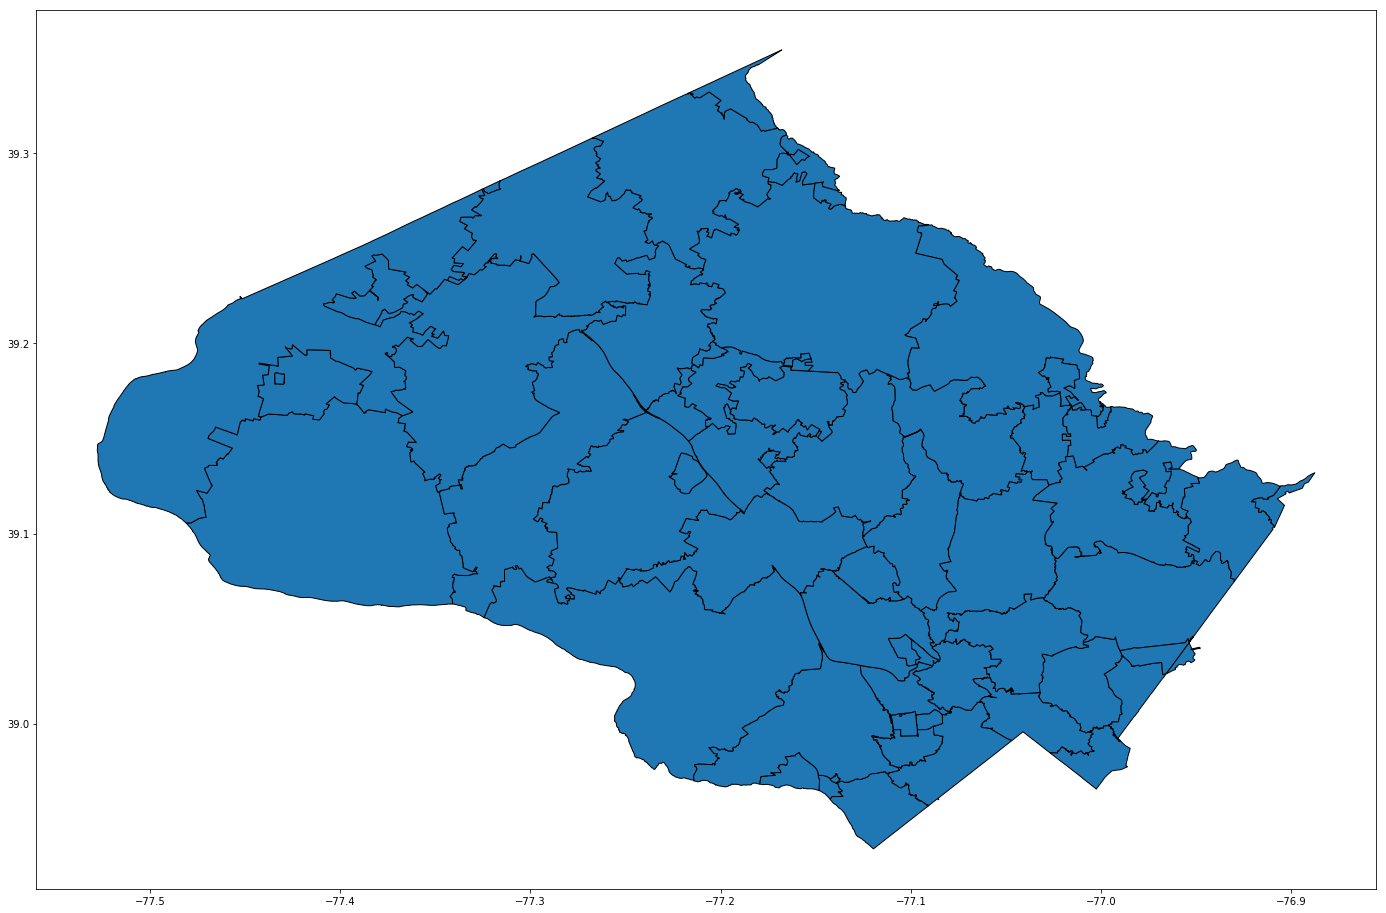

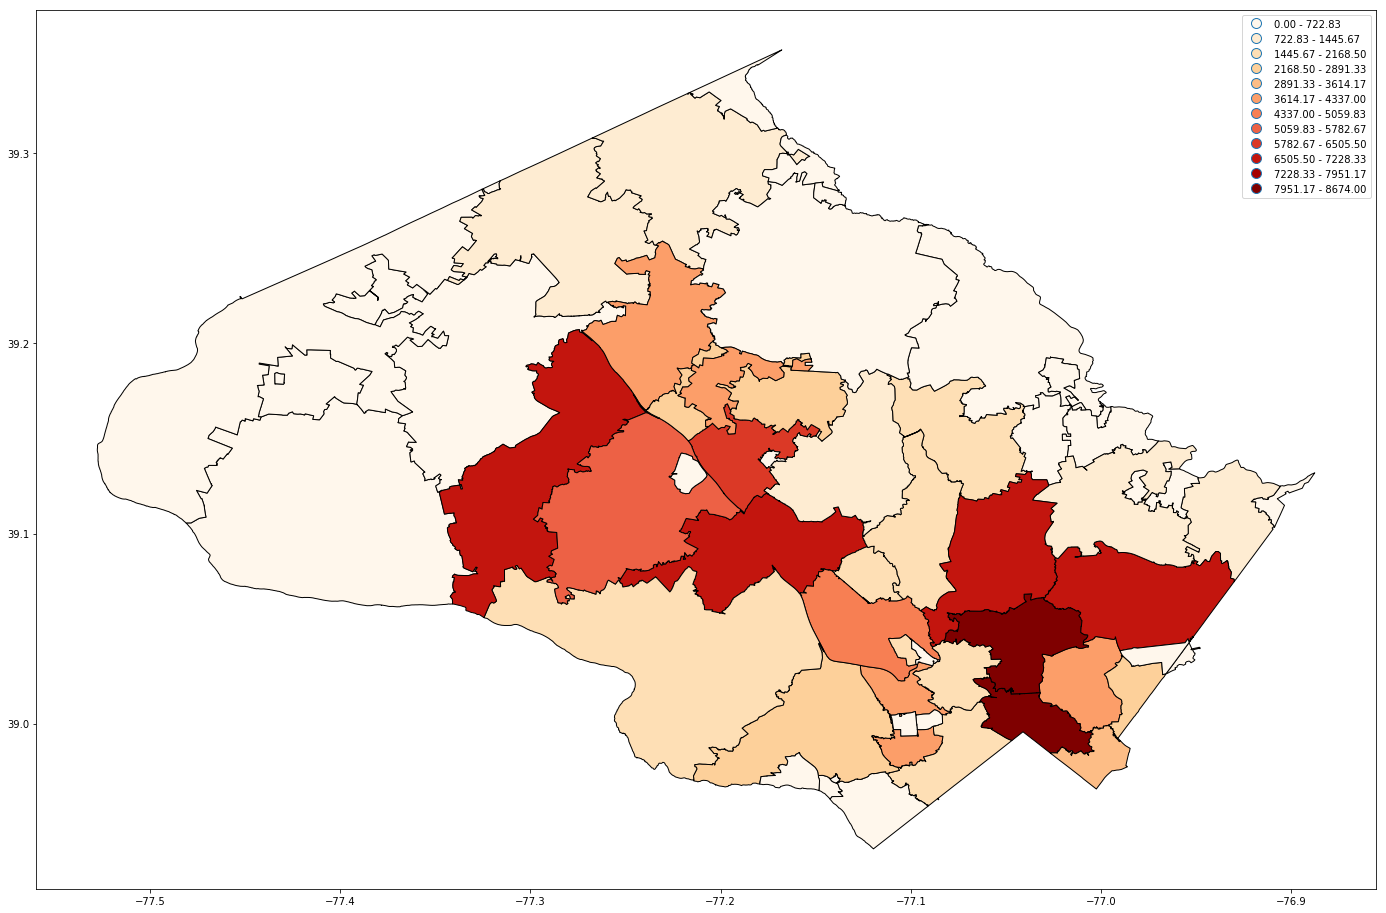

In [7]:
unique_zip = data['Zip Code'].nunique()
zipvalues = list(map(int, data['Zip Code'].value_counts().keys().tolist()))
zipcounts = list(map(int, data['Zip Code'].value_counts().tolist()))
ugh = []
zipcodes = zipcodes.sort_values('zipcode')
for z in zipcodes["zipcode"]:
    try:
        ugh.append(zipcounts[zipvalues.index(z)])
    except:
        ugh.append(0)
zipcodes['crime'] = ugh
uzip = zipcodes.drop_duplicates("zipcode")
zipcodes.plot(figsize = (24,48),edgecolor = 'black')
zipcodes.plot(column = 'crime', cmap = "OrRd", scheme = 'equal_interval', k = 12, legend = True,figsize = (24,48),edgecolor = 'black')

In [ ]:
forzip = uzip
ay = zipcodes.plot(column = 'crime', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
forzip.apply(lambda x: ay.annotate(s=x.zipcode, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [ ]:
forcrime = uzip
ay = zipcodes.plot(column = 'crime', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
forcrime.apply(lambda x: ay.annotate(s=x.crime, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [ ]:
bar = (pd.DataFrame(uzip)).sort_values(['crime'])
ax = bar.plot(x = 'zipcode', y = 'crime', kind = 'barh', figsize = (20,20),title = 'Crime per Zipcode', legend = False)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.19,str(i.get_width()))


In [8]:
def names(Name,title,size):
    namevalues = list(map(str, data[Name].value_counts().keys().tolist()))
    namecounts = list(map(int, data[Name].value_counts().tolist()))
    crimename = pd.DataFrame({'Type':namevalues,'repeat':namecounts})
    namebar = (crimename).sort_values(['repeat'])
    ax = namebar.plot(x = 'Type', y = 'repeat', kind = 'barh', figsize = size,title = title,legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+100, i.get_y()+.19,str(i.get_width()))

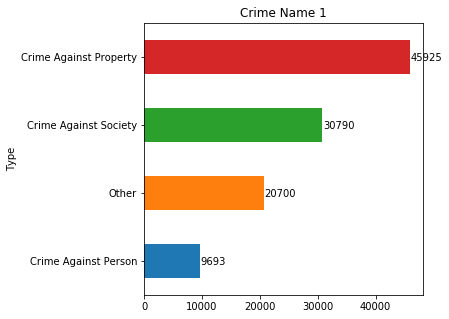

In [9]:
names("Crime Name1", "Crime Name 1",(5,5))

In [ ]:
names("Crime Name2", "Crime Name 2",(20,75))

In [ ]:
names("Crime Name3", "Crime Name 3",(20,100))

In [10]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

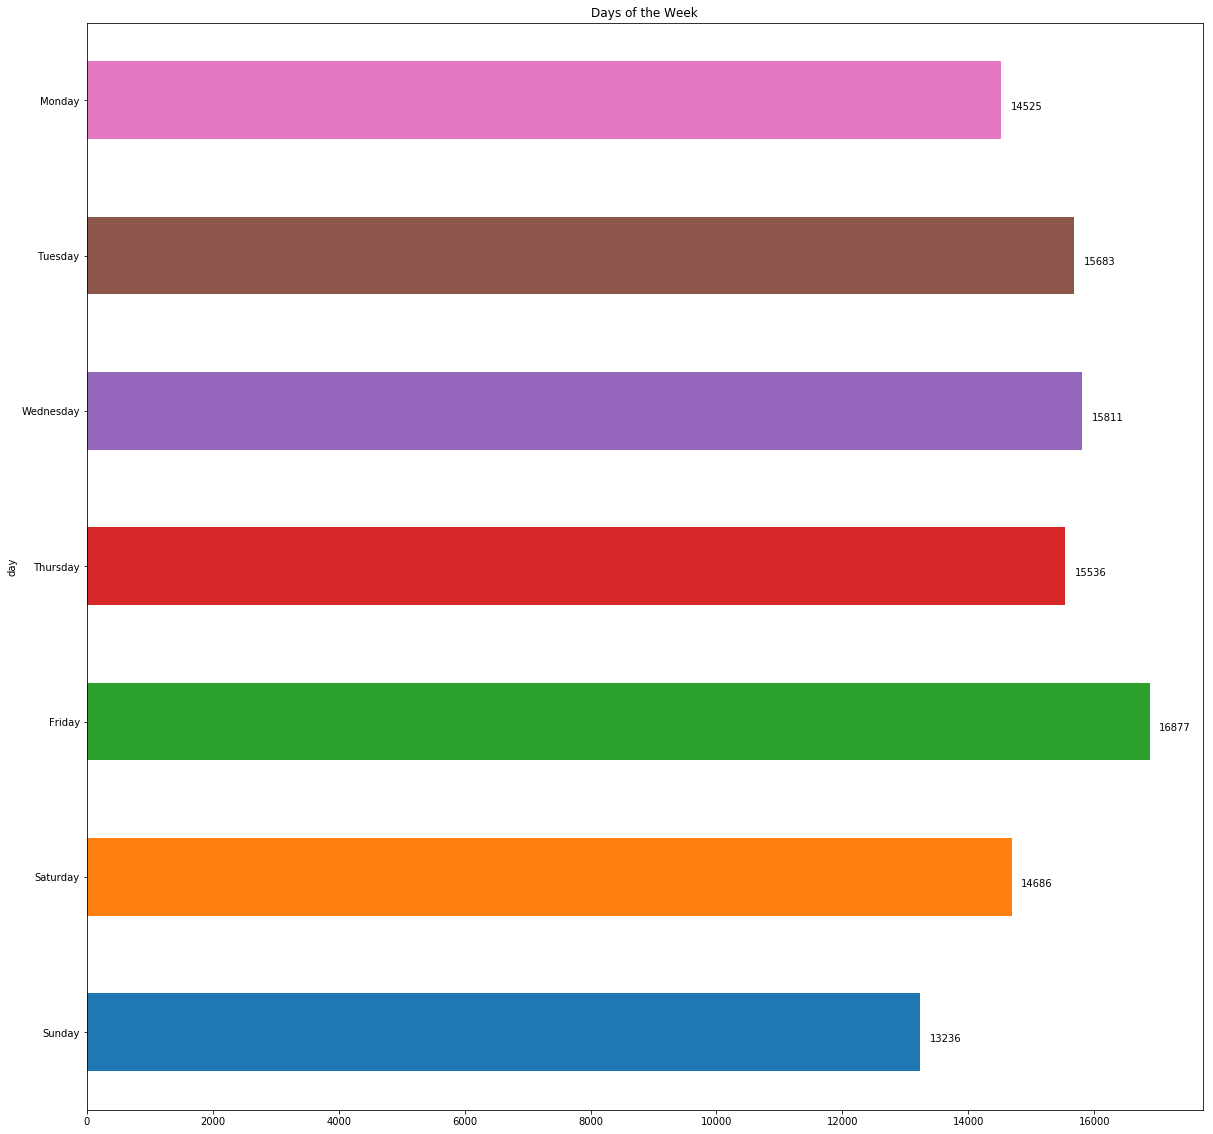

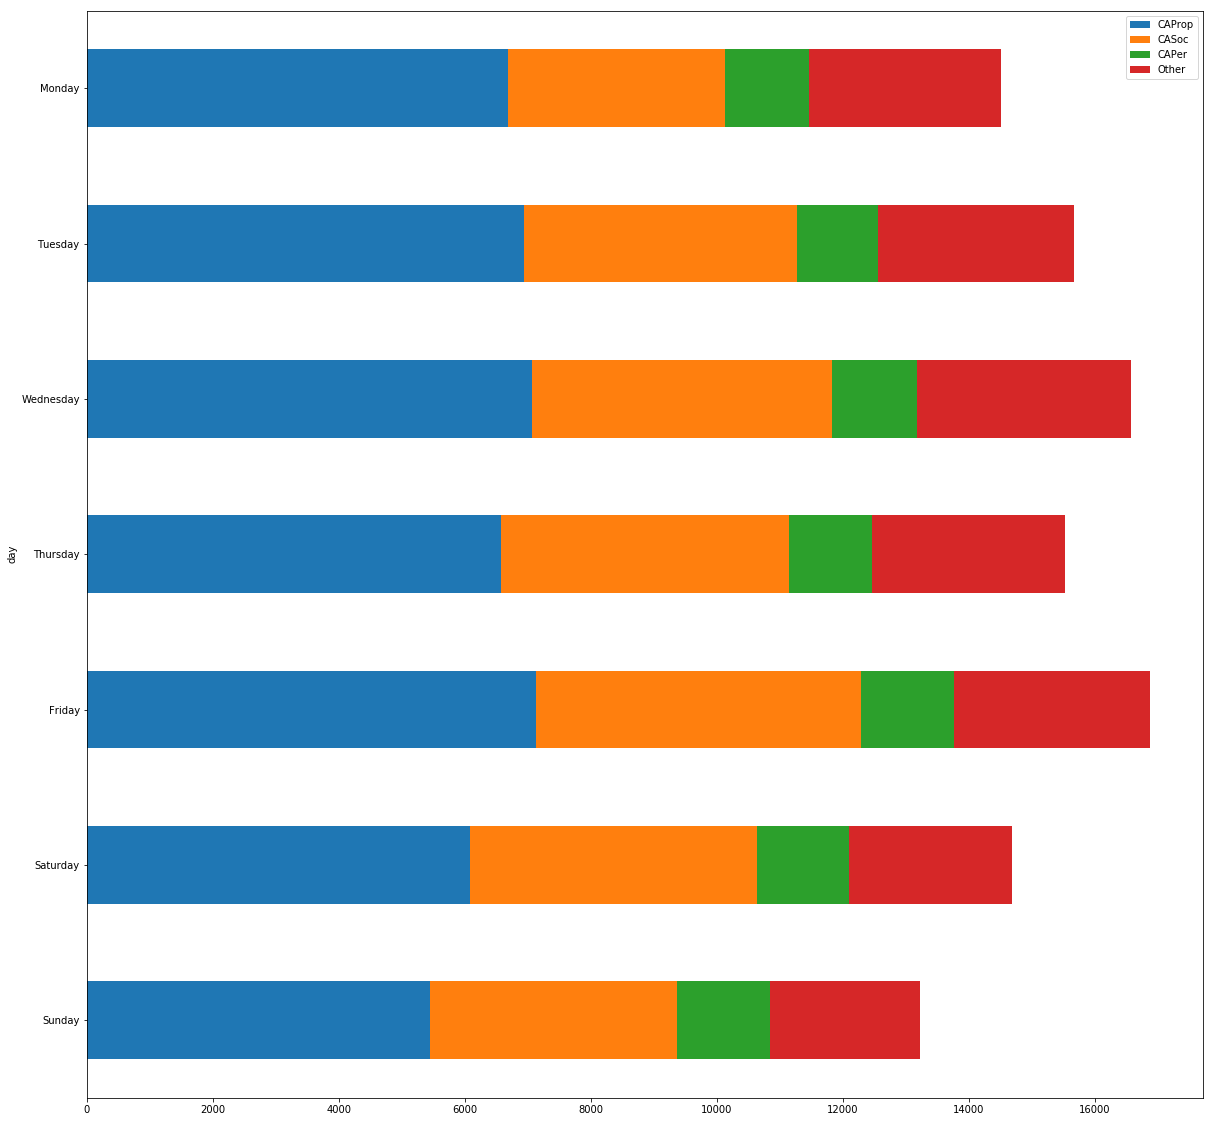

In [11]:
weekandcount(data,150,"Days of the Week")

In [12]:
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh


In [36]:
def dayandcount(data):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    ughh = []
    ughhh = []
    date = pd.DataFrame({'Date':datevalues,'count':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date'])
    bruh = [[0]*366]*4
    ugh = []
    datevalues.sort()
    for d in datevalues:
        ugh.append(d)
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][datevalues.index(row['Start Date'])] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][datevalues.index(row['Start Date'])] +=1
    date["Crime Against Property"] = bruh[0]
    date["Crime Against Society"] = bruh[1]
    date["Crime Against Person"] = bruh[2]
    date["Other"] = bruh[3]
    date = date.drop([0],axis = 0)
    date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (20,500),title = "Date", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.19,str(i.get_width()))
    ugh = date["count"]
    date = date.drop(["count"],axis = 1)
    ax = date.plot.barh(figsize = (20,500),stacked = True,x = 'Date')
    date["count"] = ugh
    return date

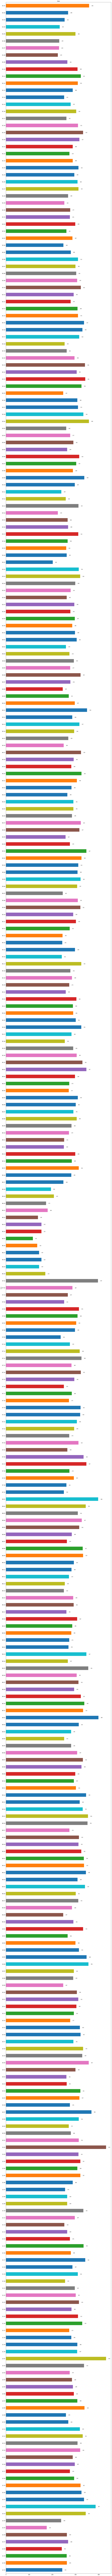

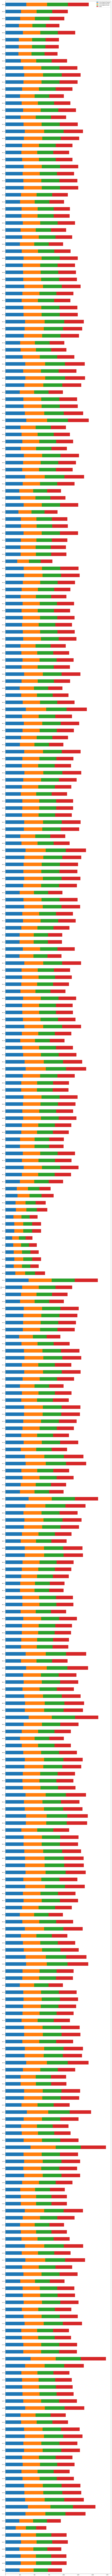

In [37]:
date = dayandcount(data)

In [38]:
print(data.head())

   Dispatch Date/Time             Crime Name1                     Crime Name2  \
0 2012-12-27 00:25:00  Crime Against Property  Burglary/Breaking and Entering   
1 2016-02-26 16:26:00  Crime Against Property        Theft From Motor Vehicle   
2 2016-06-17 10:21:00   Crime Against Society              All Other Offenses   
3 2016-08-10 18:56:00  Crime Against Property                   Impersonation   
4 2017-04-22 13:26:00  Crime Against Property             Theft from Building   

                                         Crime Name3 Police District Name  \
0             BURGLARY - FORCED ENTRY-NONRESIDENTIAL            ROCKVILLE   
1                                LARCENY - FROM AUTO           GERMANTOWN   
2  SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...            ROCKVILLE   
3                              FRAUD - IMPERSONATION             BETHESDA   
4                                LARCENY - FROM BLDG        SILVER SPRING   

         Block_Address          City   Zip Code Ag

In [39]:
jan = date.loc[date['month'] == "01"]
feb = date.loc[date['month'] == "02"]
mar = date.loc[date['month'] == "03"]
apr = date.loc[date['month'] == "04"]
may = date.loc[date['month'] == "05"]
jun = date.loc[date['month'] == "06"]
jul = date.loc[date['month'] == "07"]
aug = date.loc[date['month'] == "08"]
sep = date.loc[date['month'] == "09"]
octo = date.loc[date['month'] == "10"]
nov = date.loc[date['month'] == "11"]
dec = date.loc[date['month'] == "12"]

In [40]:
print(jan.head())

      Date month day  Crime Against Property  Crime Against Society  \
257  01-31    01  31                     276                    276   
248  01-30    01  30                     277                    277   
321  01-29    01  29                     252                    252   
279  01-28    01  28                     268                    268   
103  01-27    01  27                     313                    313   

     Crime Against Person  Other  count  
257                   276    276    276  
248                   277    277    277  
321                   252    252    252  
279                   268    268    268  
103                   313    313    313  


In [86]:
daycount = [0]*31
cap = [0]*31
cas = [0]*31
capp = [0]*31
oth = [0]*31

In [87]:
def monthh(mon,title):
    mon = mon.sort_values(['Date'])
    i = 0
    for index, row in mon.iterrows():
        daycount[i] = row['count']
        cap[i] = row['Crime Against Property']
        cas[i] = row['Crime Against Society']
        capp[i] = row['Crime Against Person']
        oth[i] = row['Other']
        i = i + 1
    mon = mon.iloc[::-1]
    ax = mon.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.19,str(i.get_width()))
    ugh = mon["count"]
    mon = mon.drop(["count"],axis = 1)
    ax = mon.plot.barh(figsize = (20,20),stacked = True,x = 'Date',title = title)
    mon["count"] = ugh
    return date

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,Date,month,day,Crime Against Property,Crime Against Society,Crime Against Person,Other,count
339,12-31,12,31,243,243,243,243,243
295,12-30,12,30,263,263,263,263,263
299,12-29,12,29,262,262,262,262,262
342,12-28,12,28,240,240,240,240,241
281,12-27,12,27,268,268,268,268,268
294,12-26,12,26,263,263,263,263,263
355,12-25,12,25,176,176,176,176,176
344,12-24,12,24,238,238,238,238,238
23,12-23,12,23,344,344,344,344,344
6,12-22,12,22,387,387,387,387,387


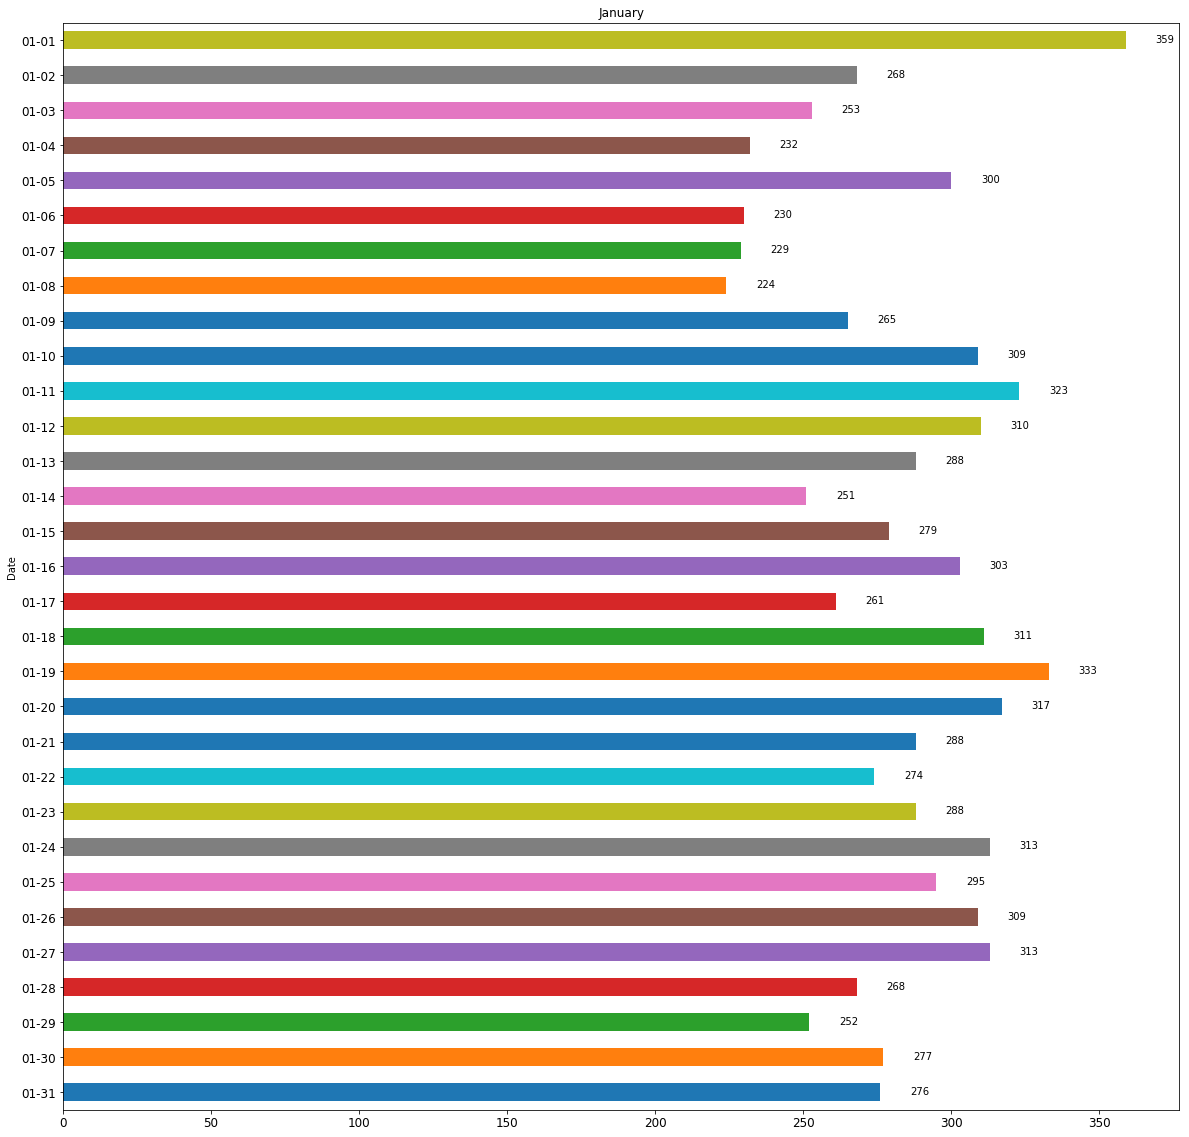

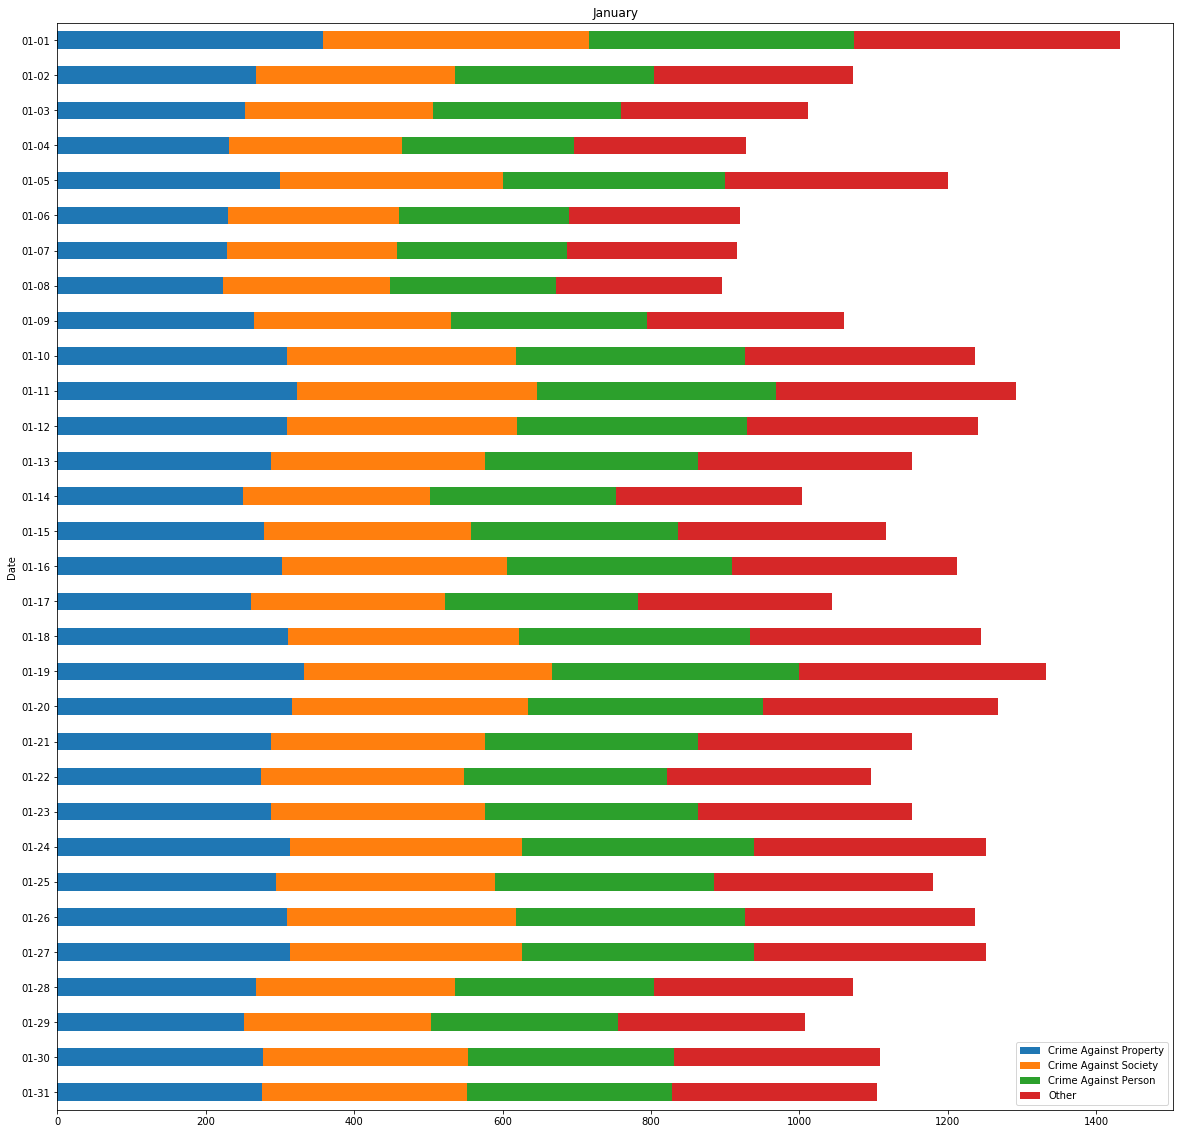

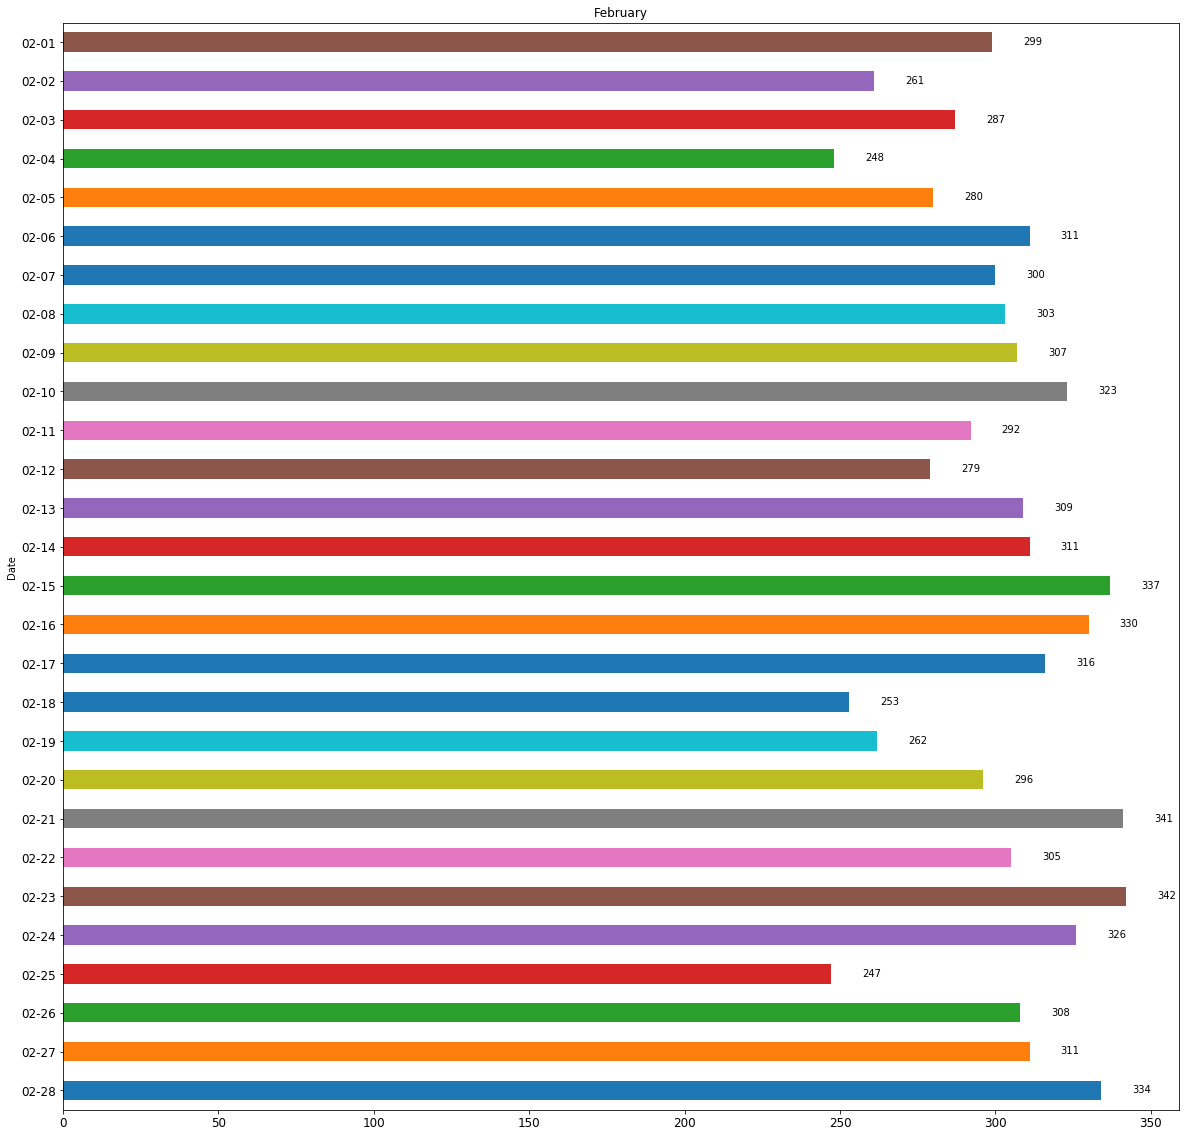

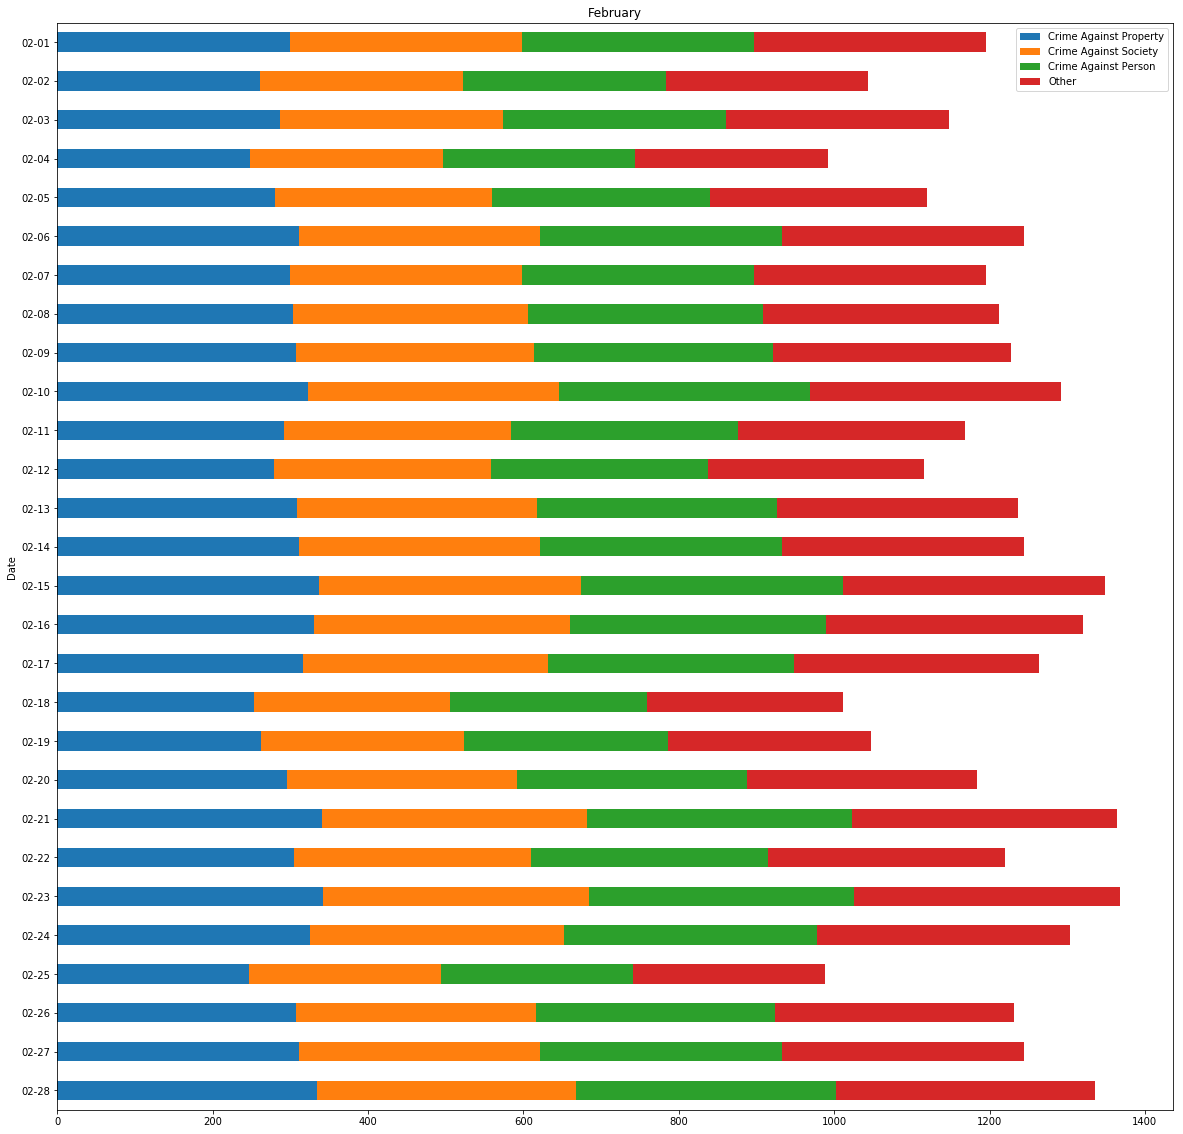

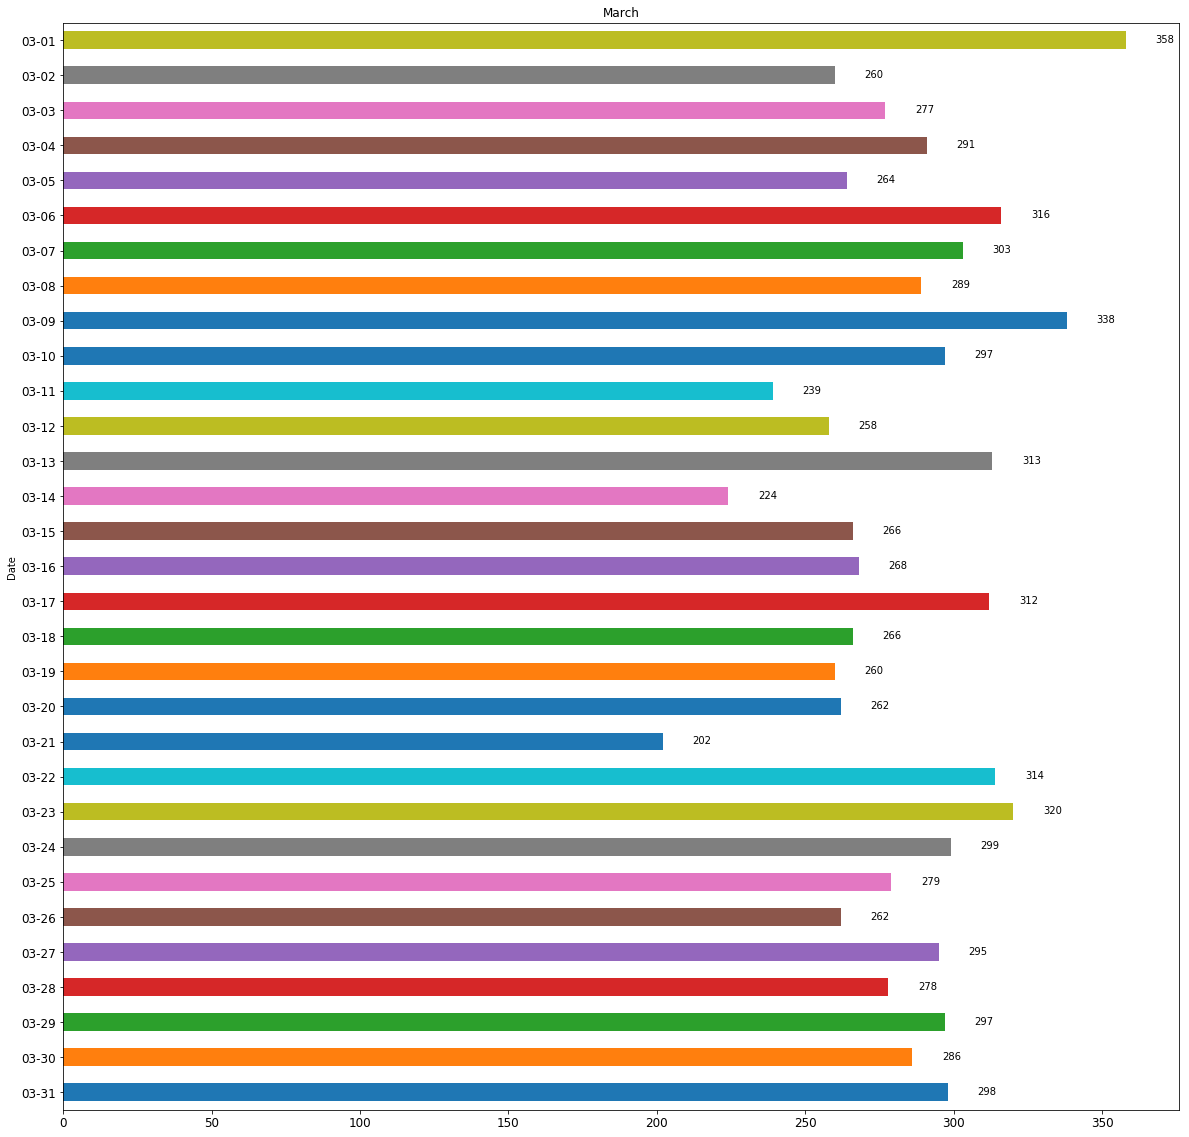

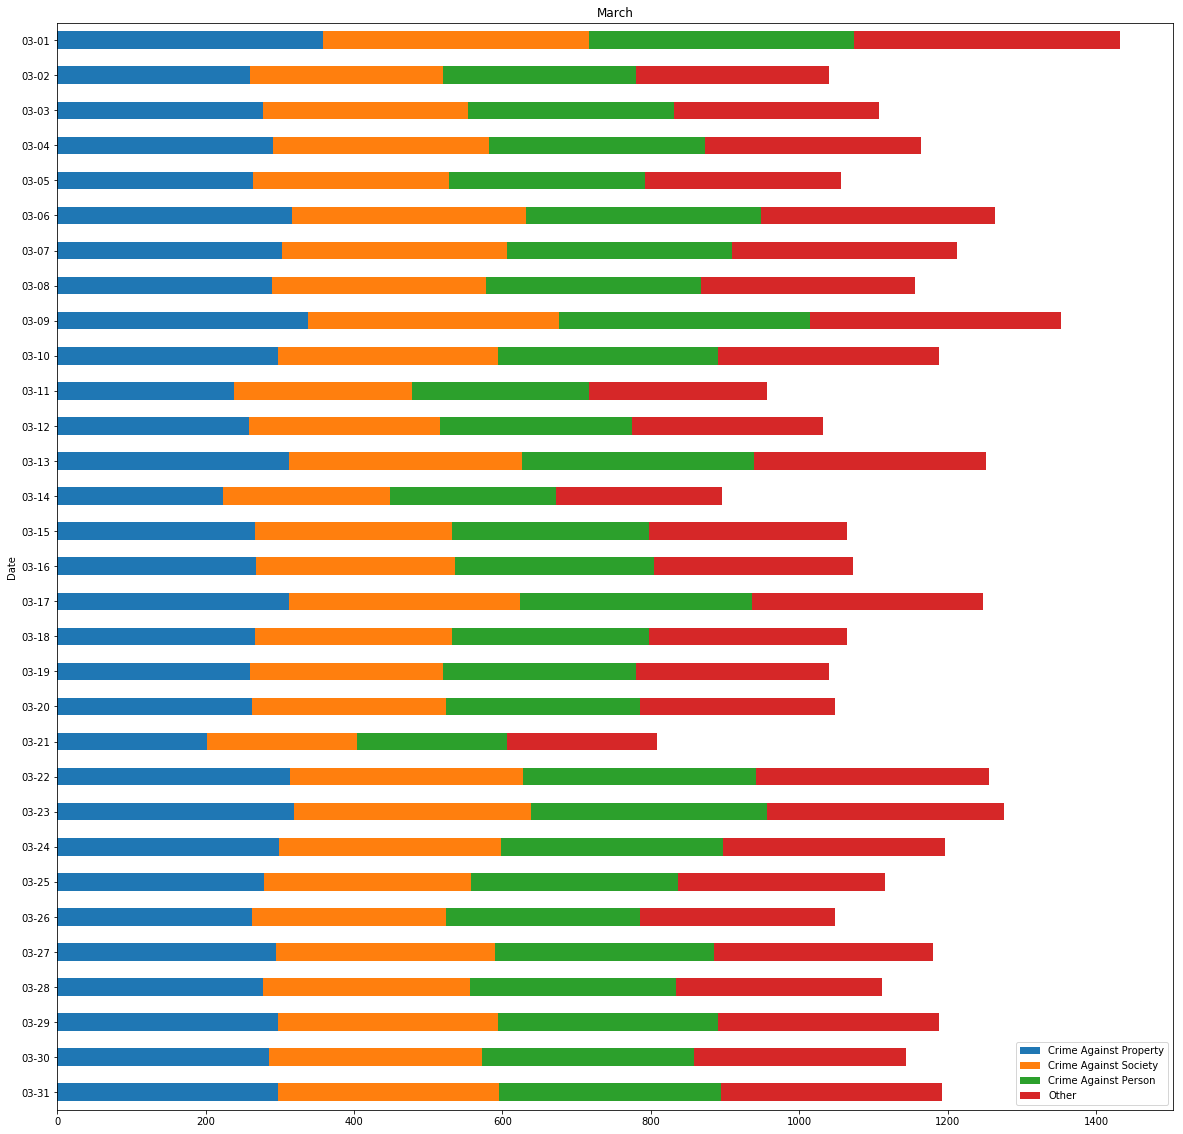

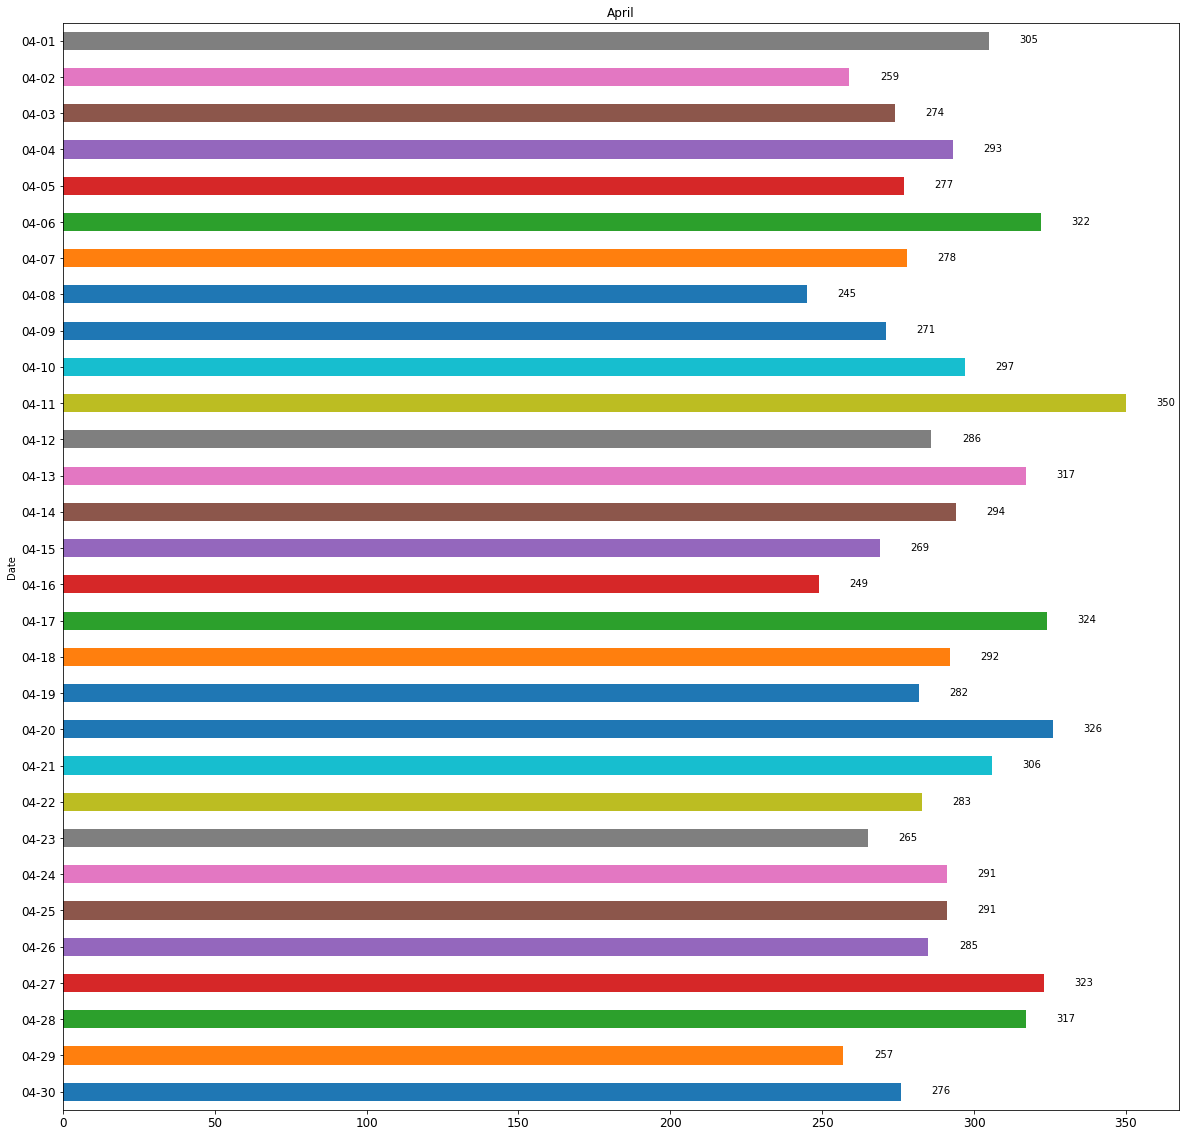

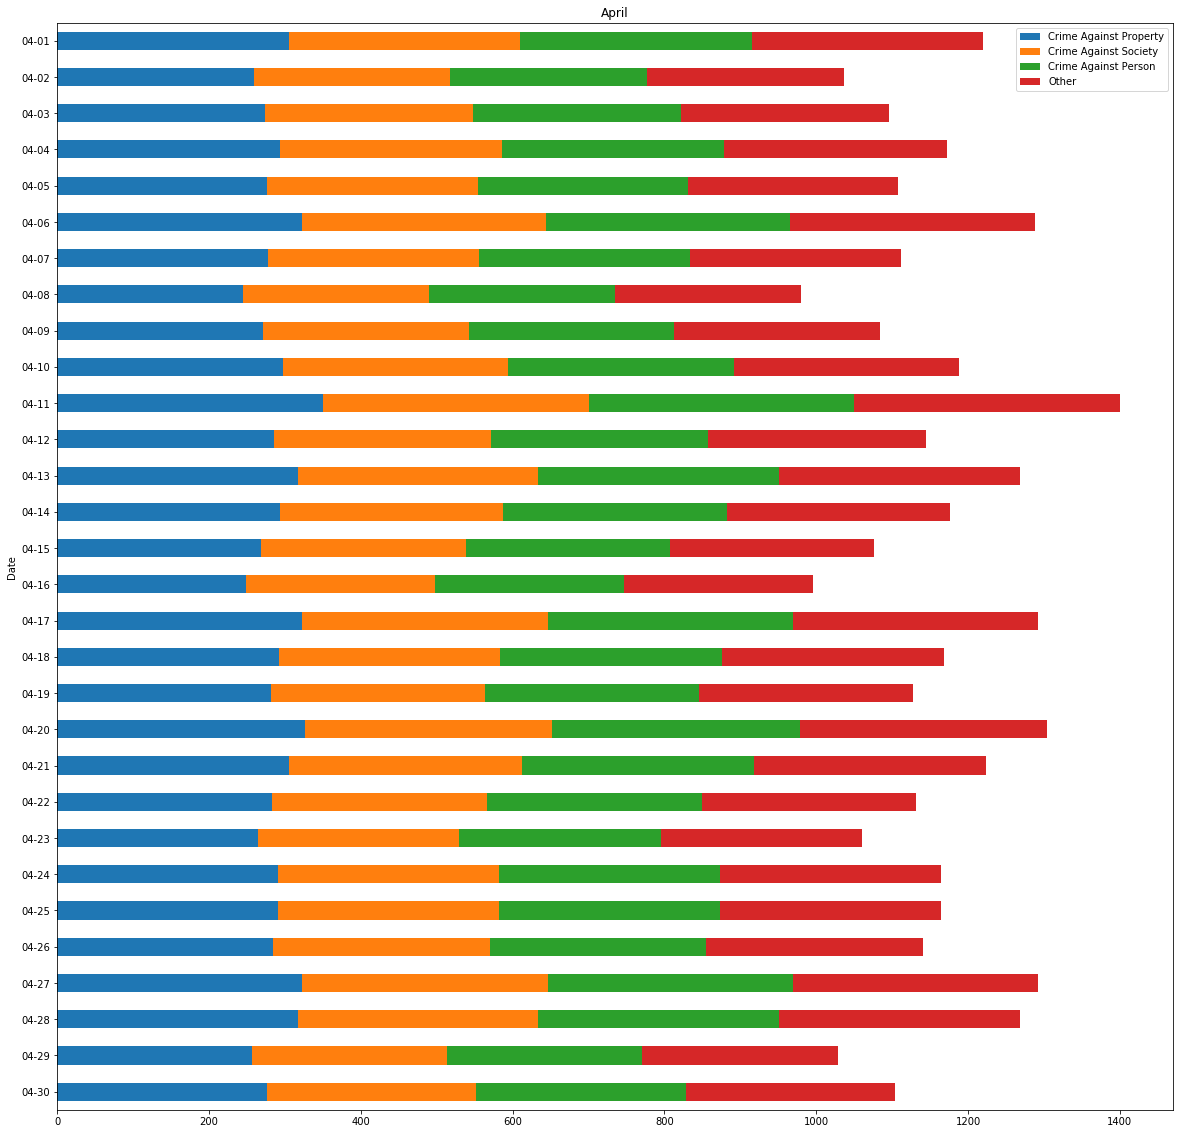

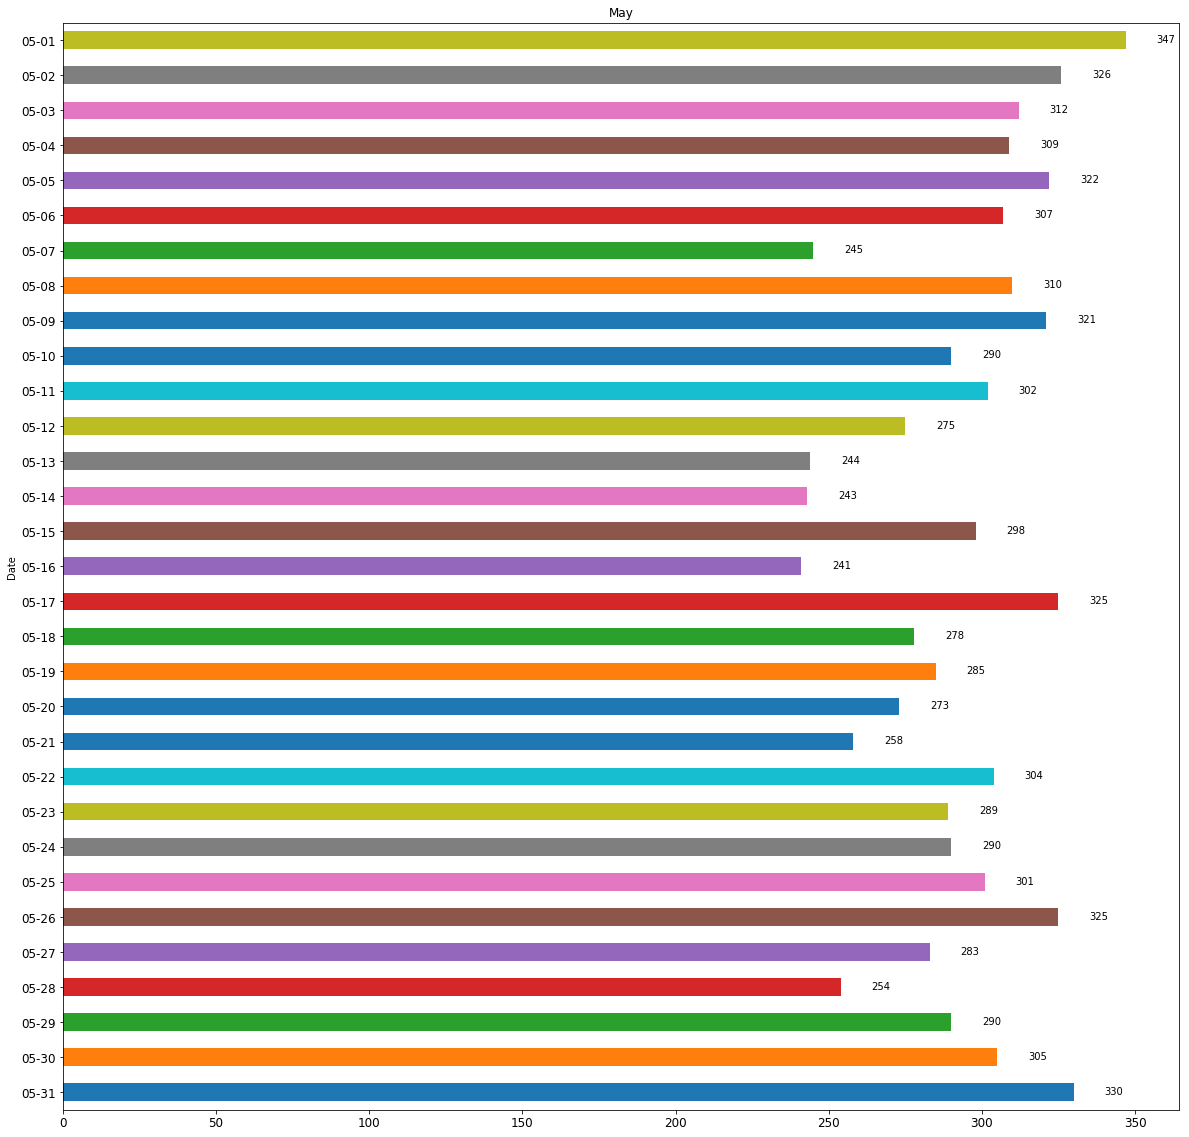

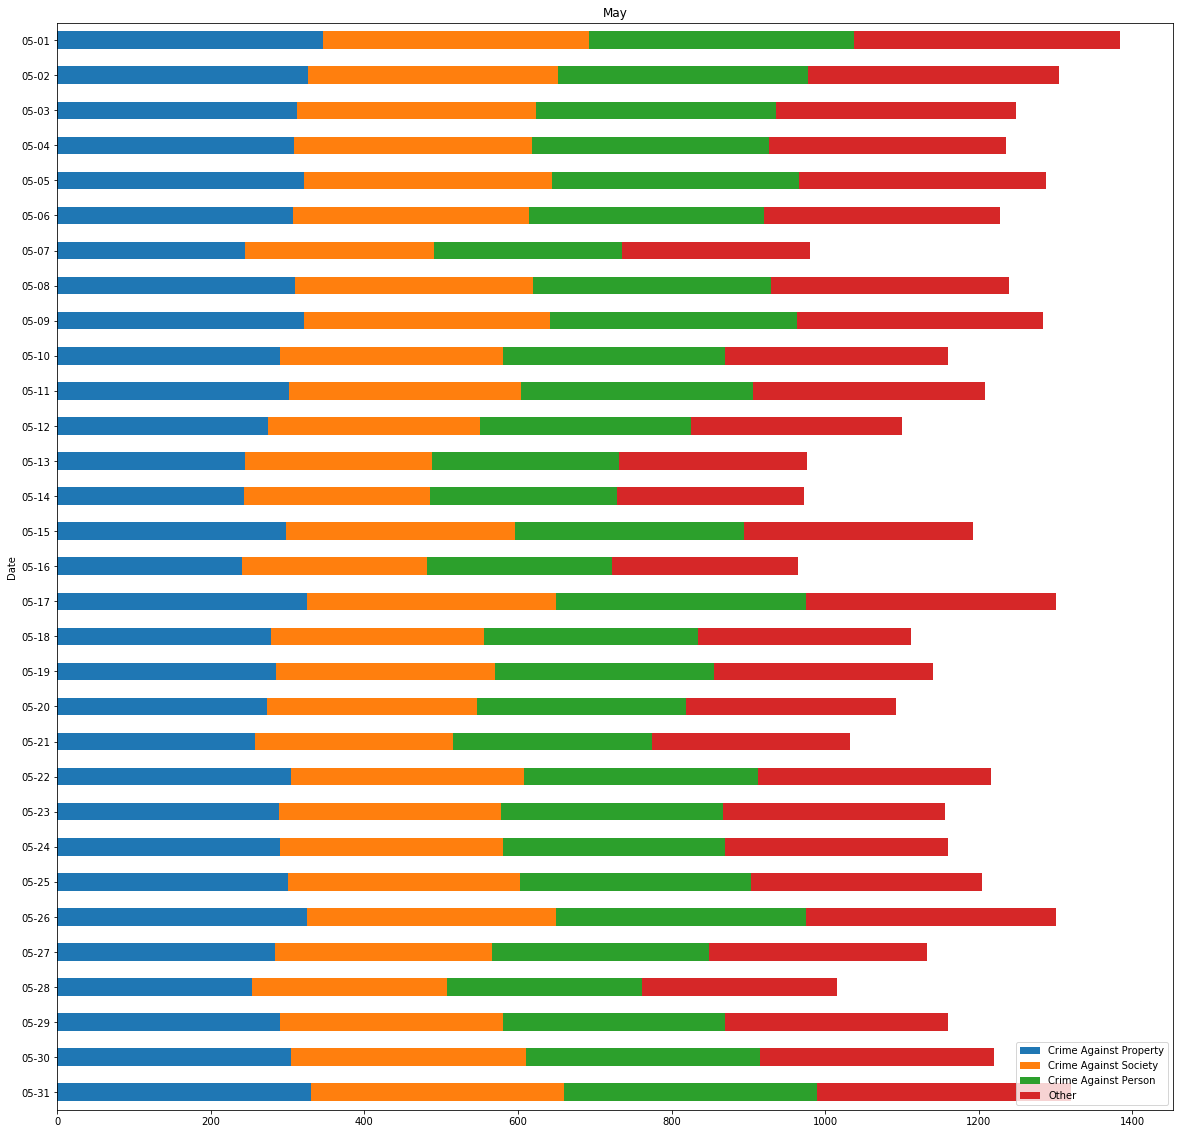

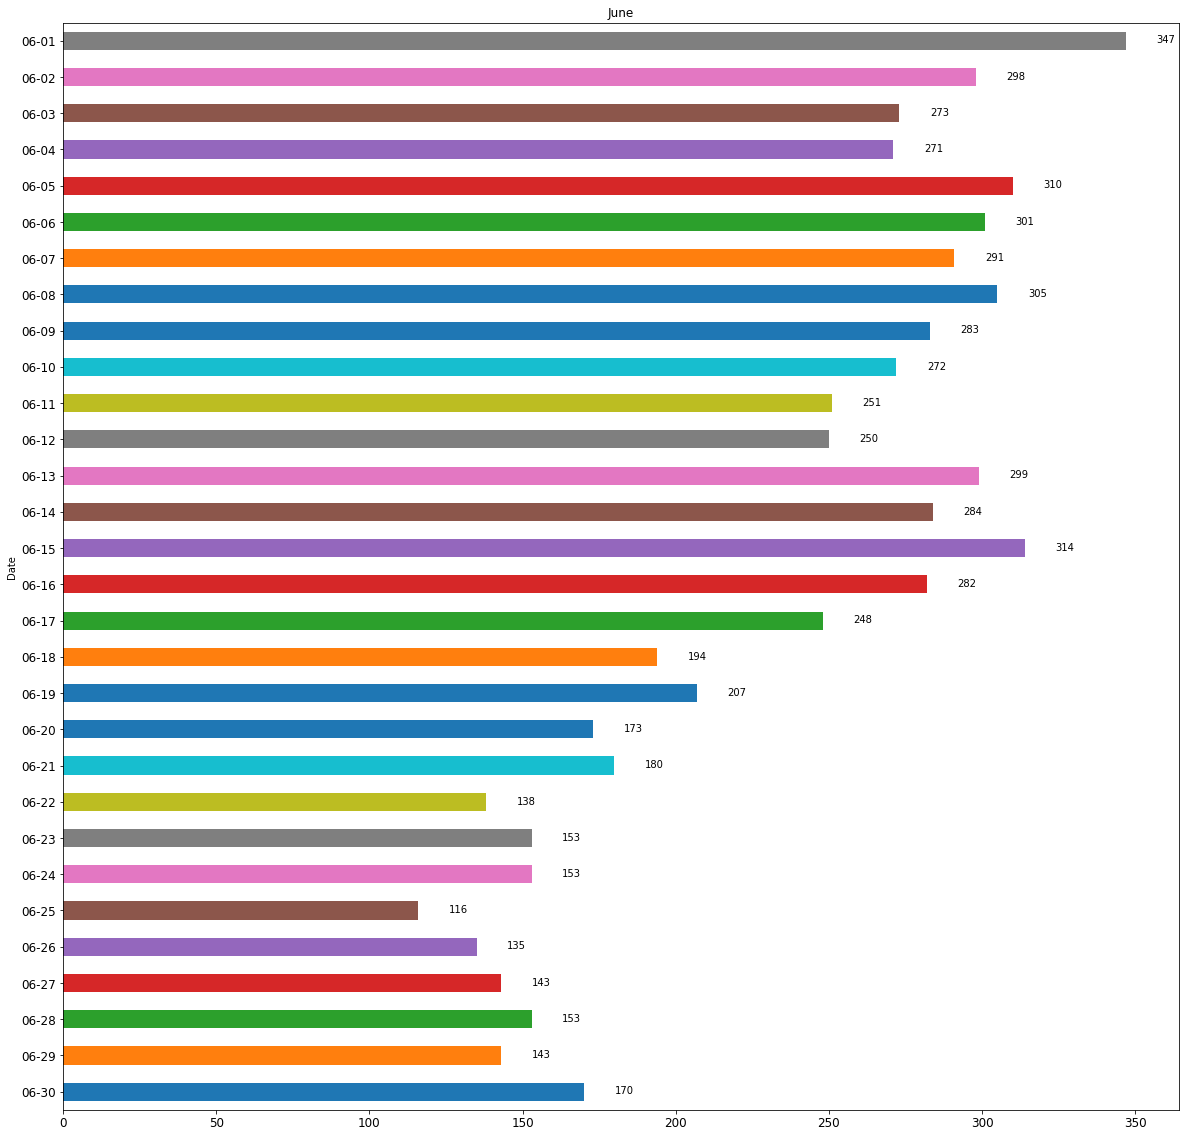

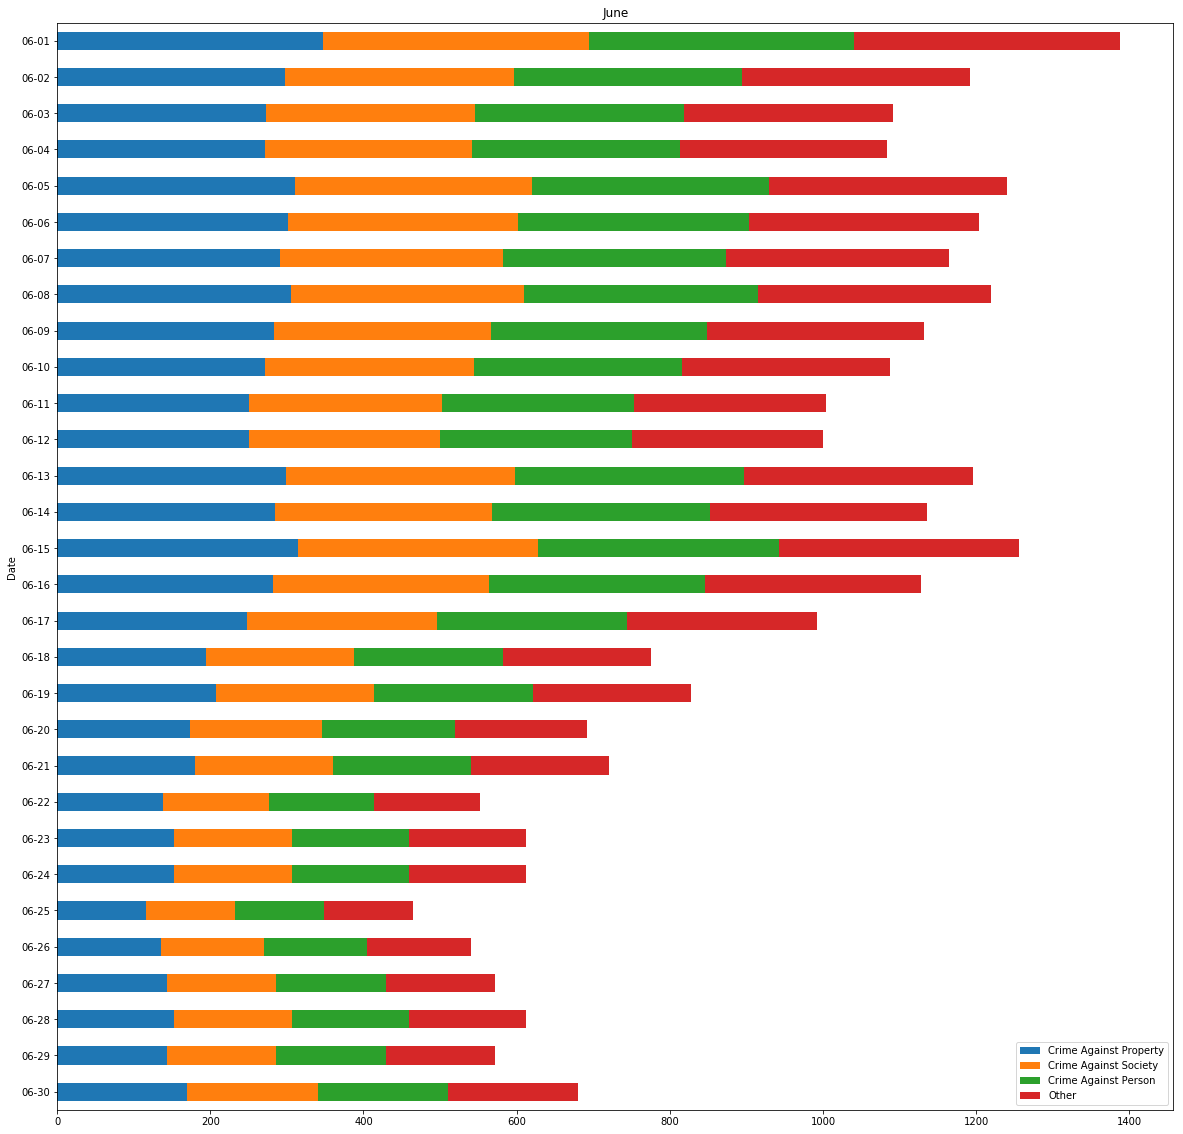

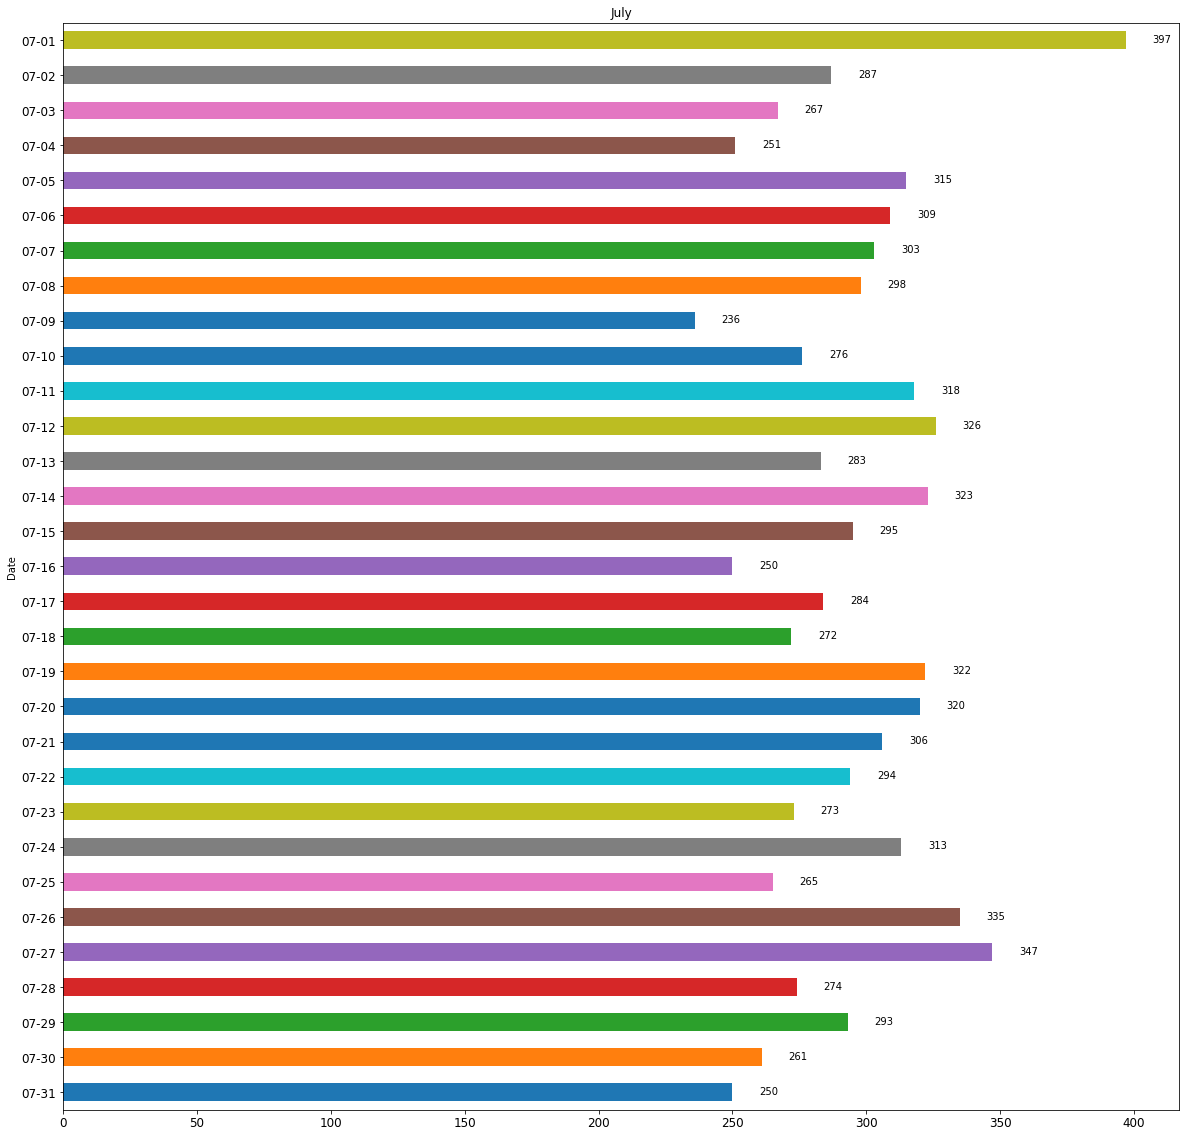

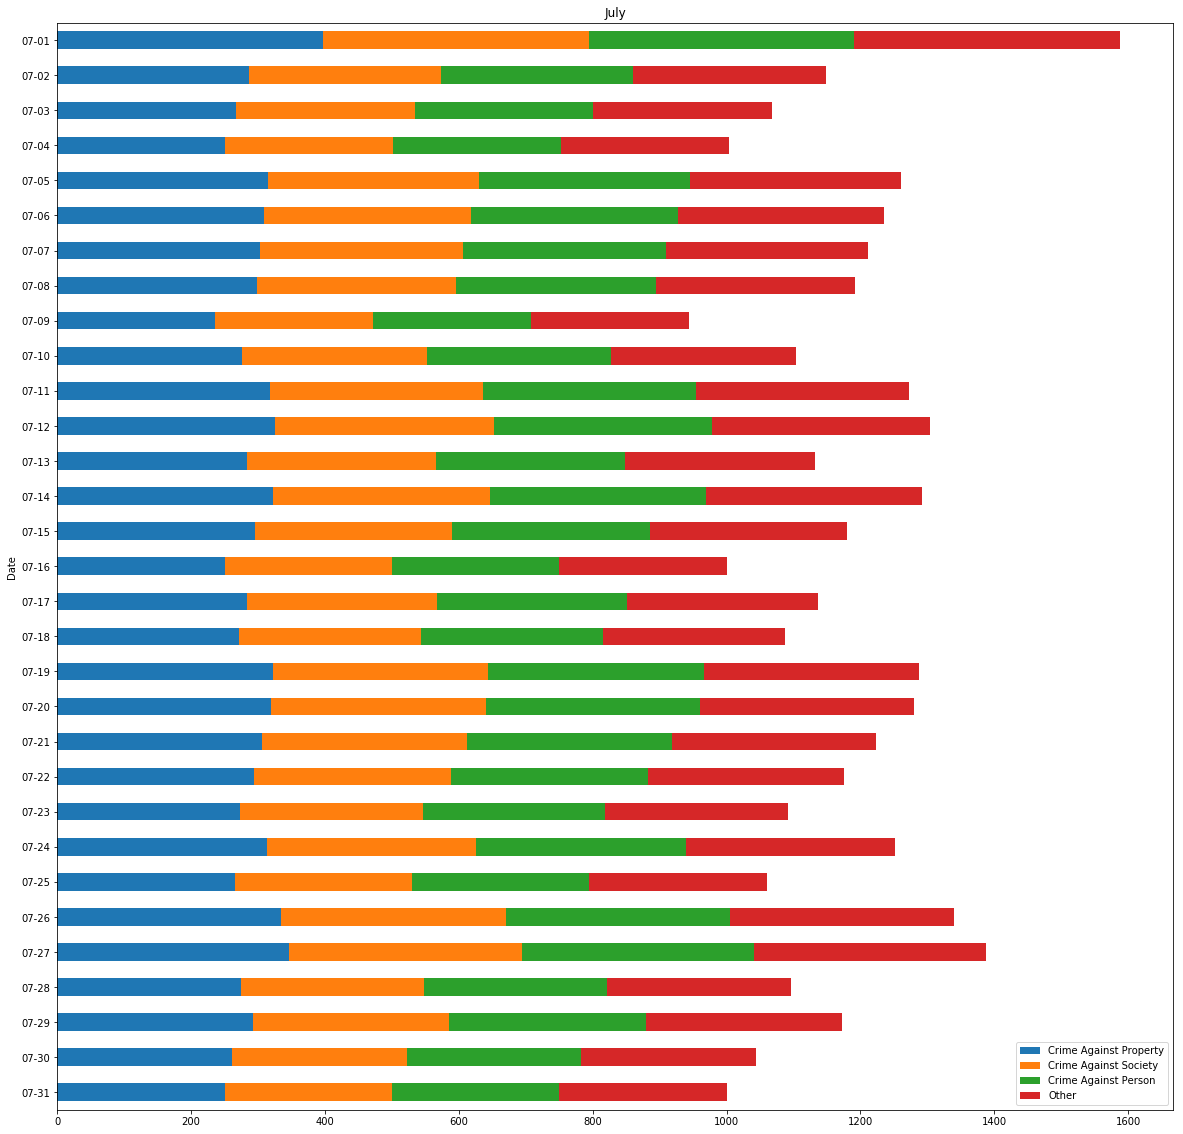

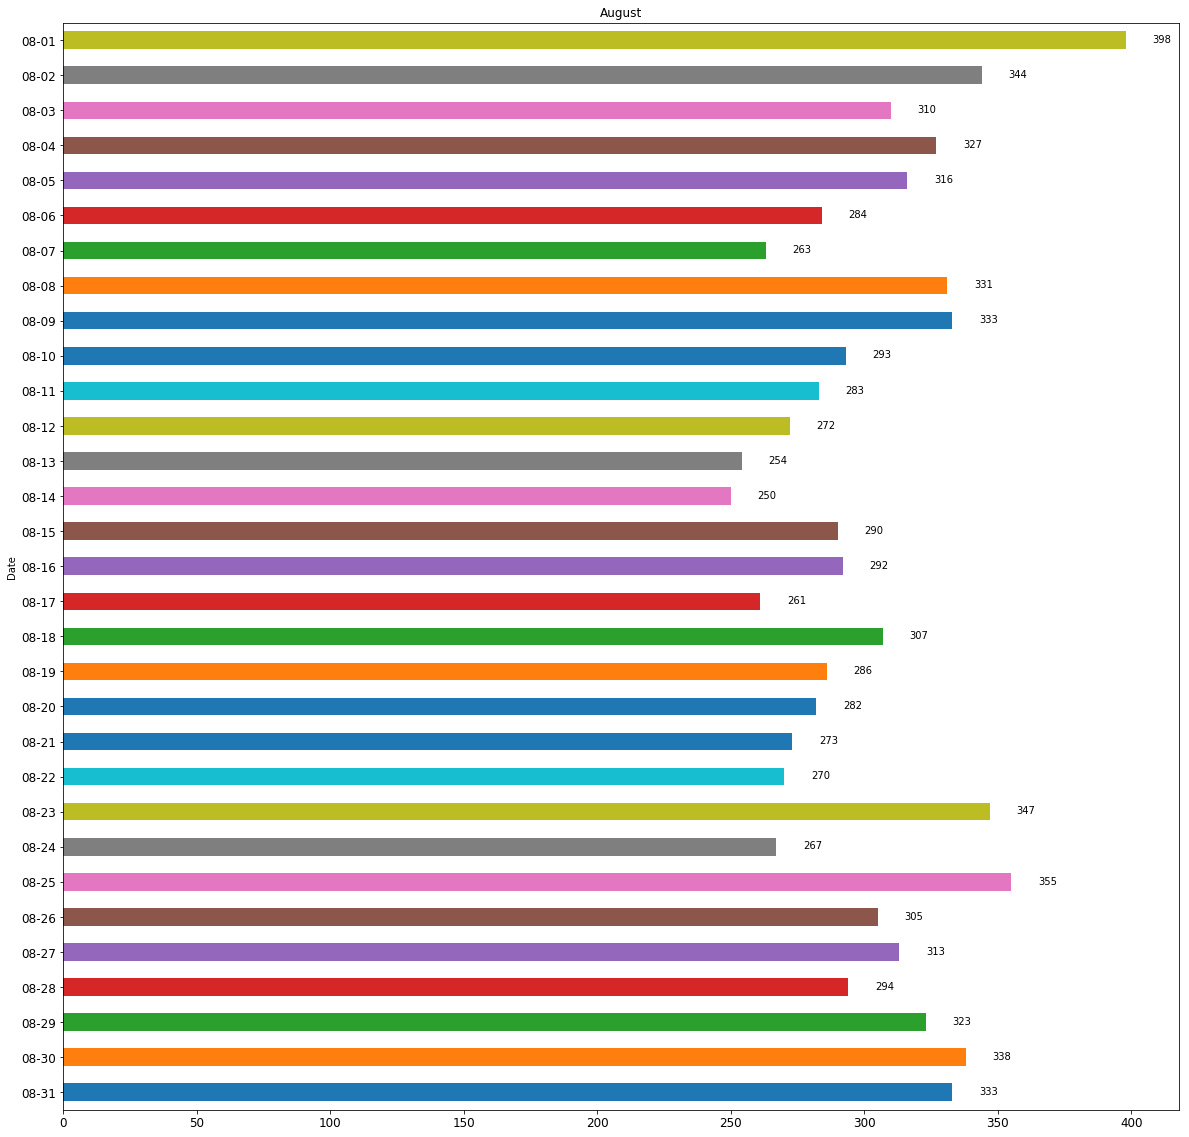

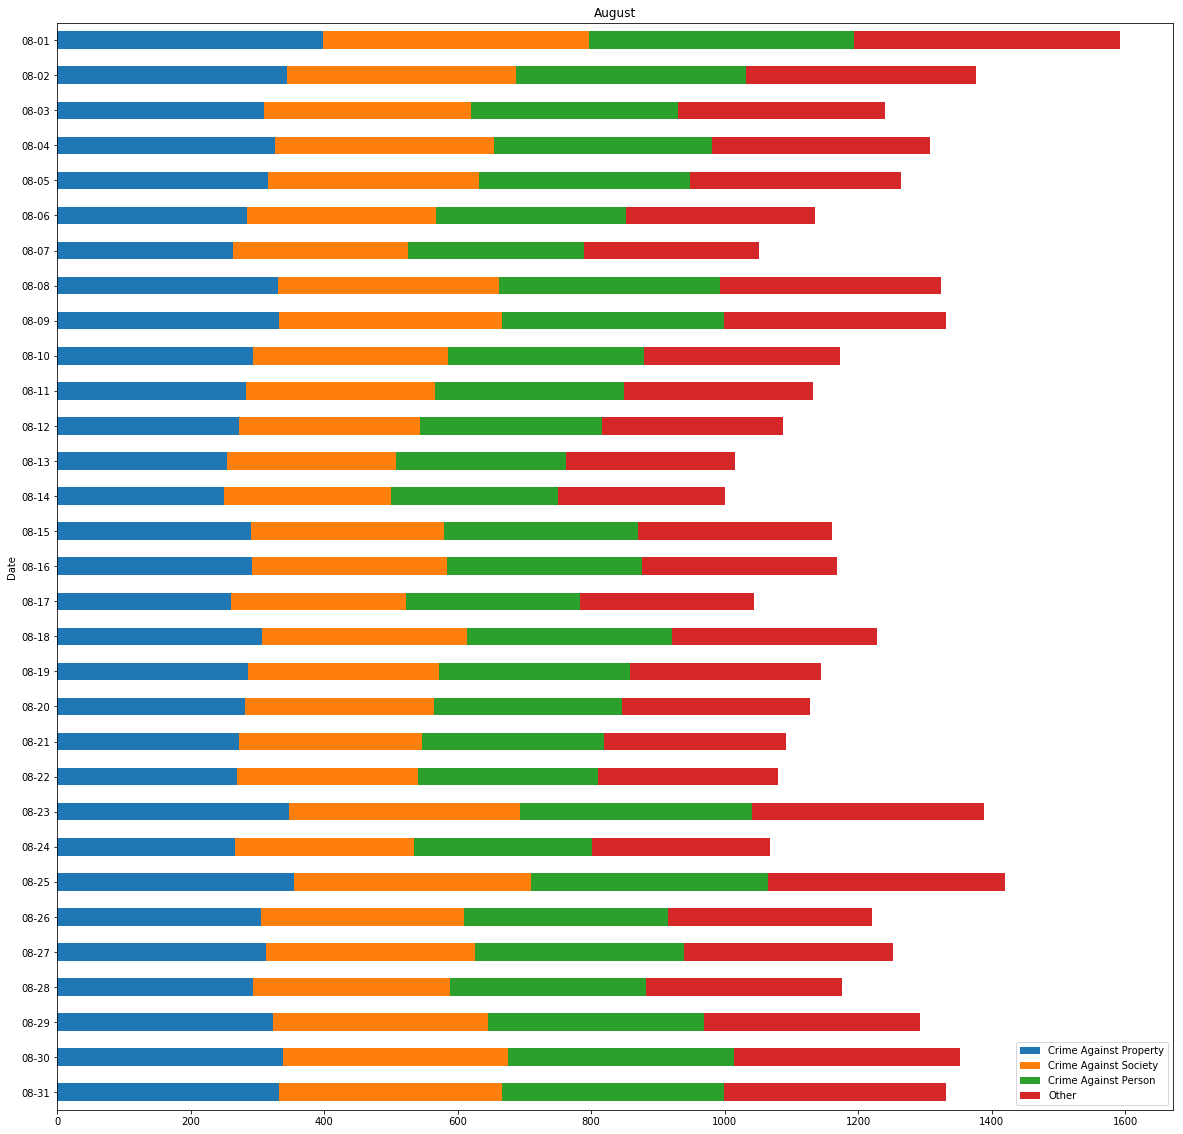

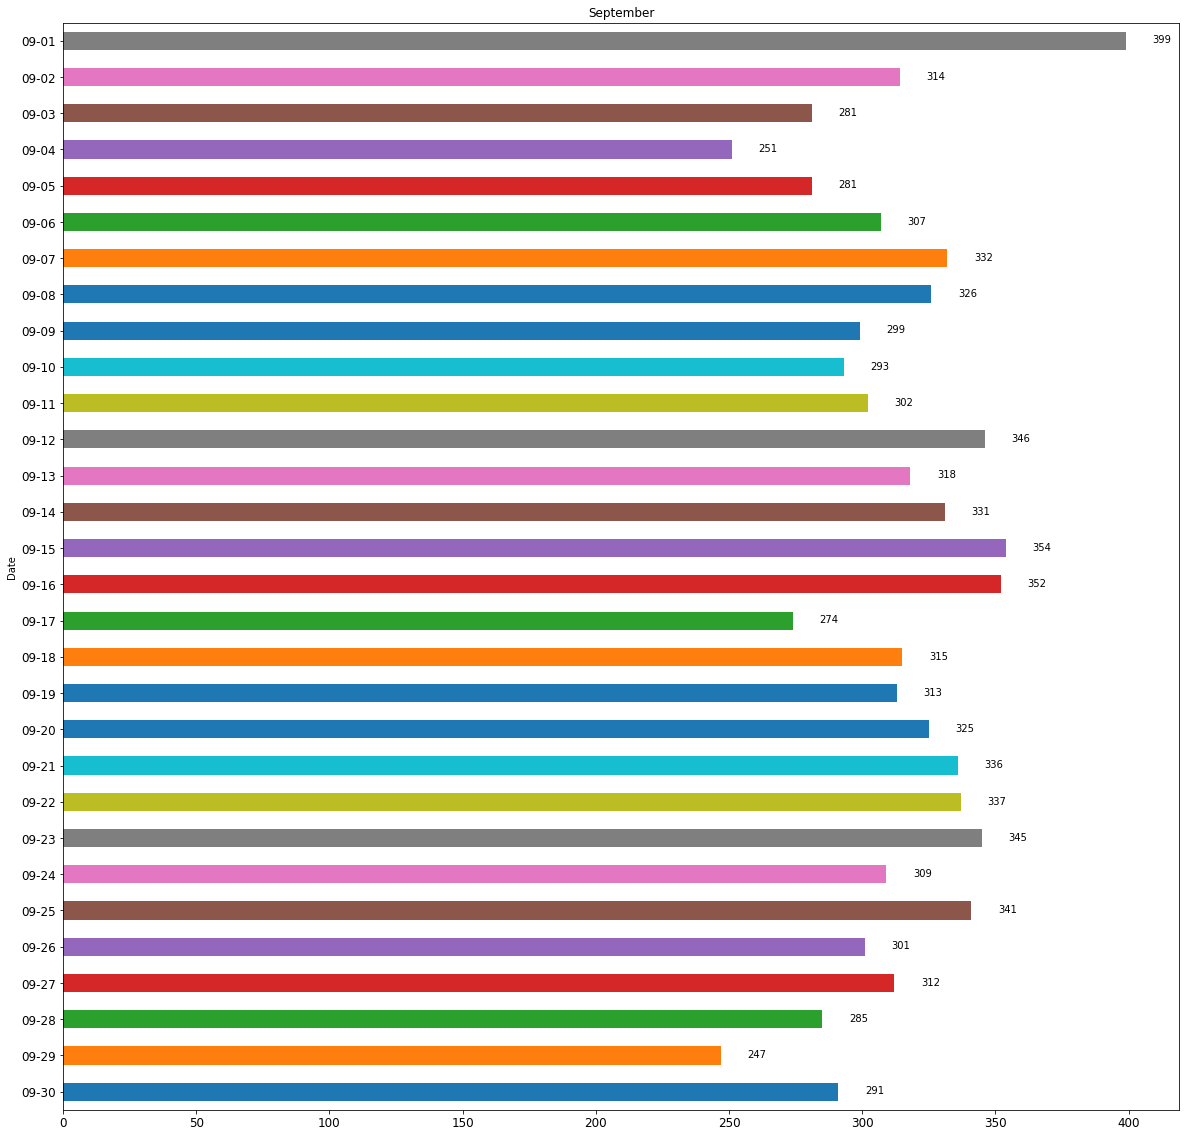

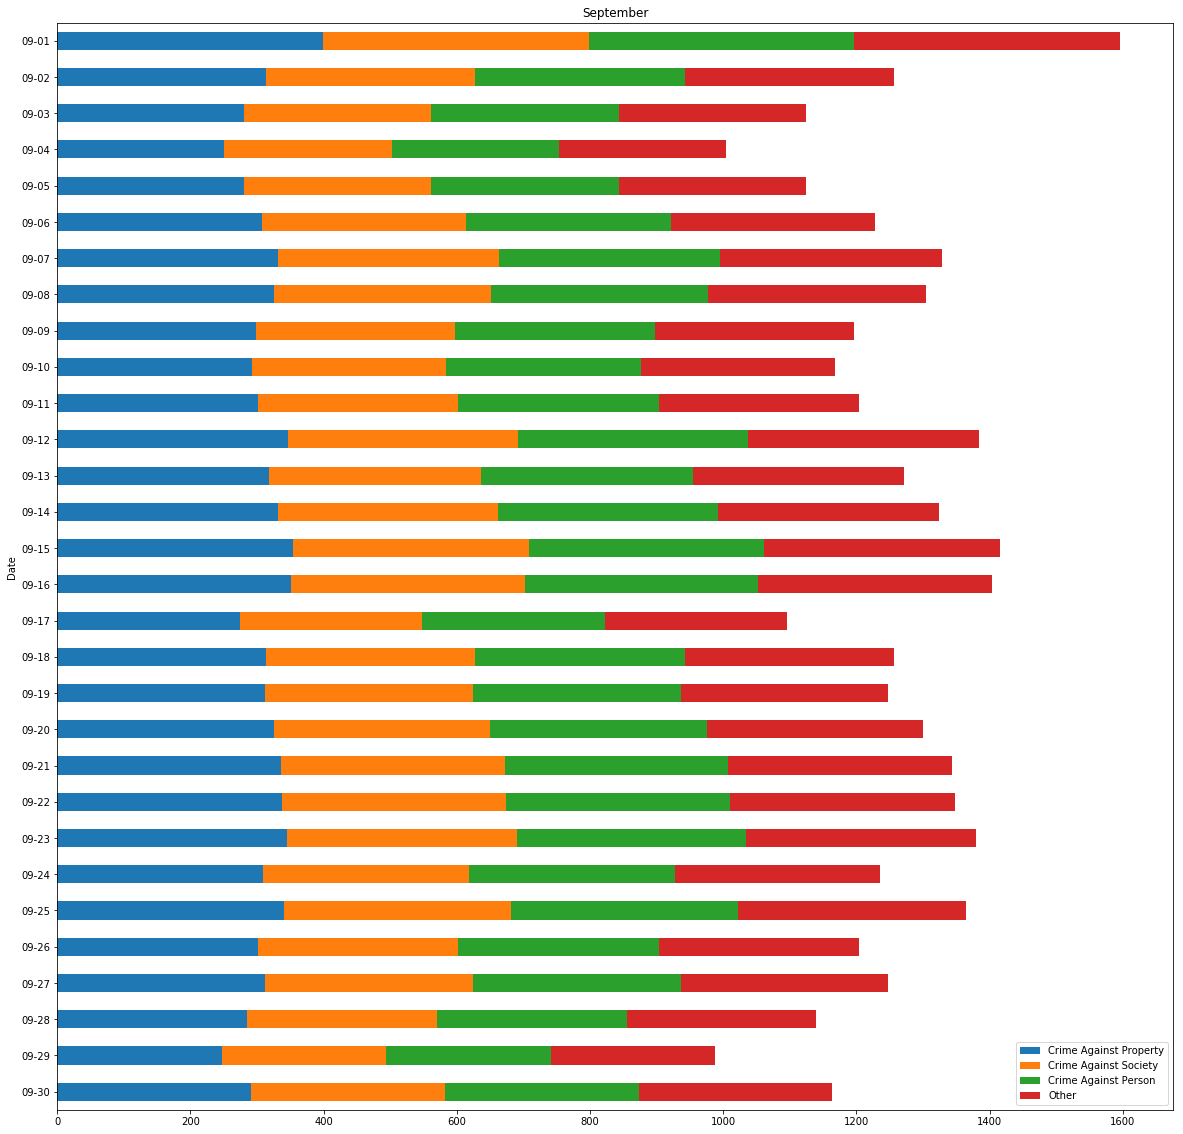

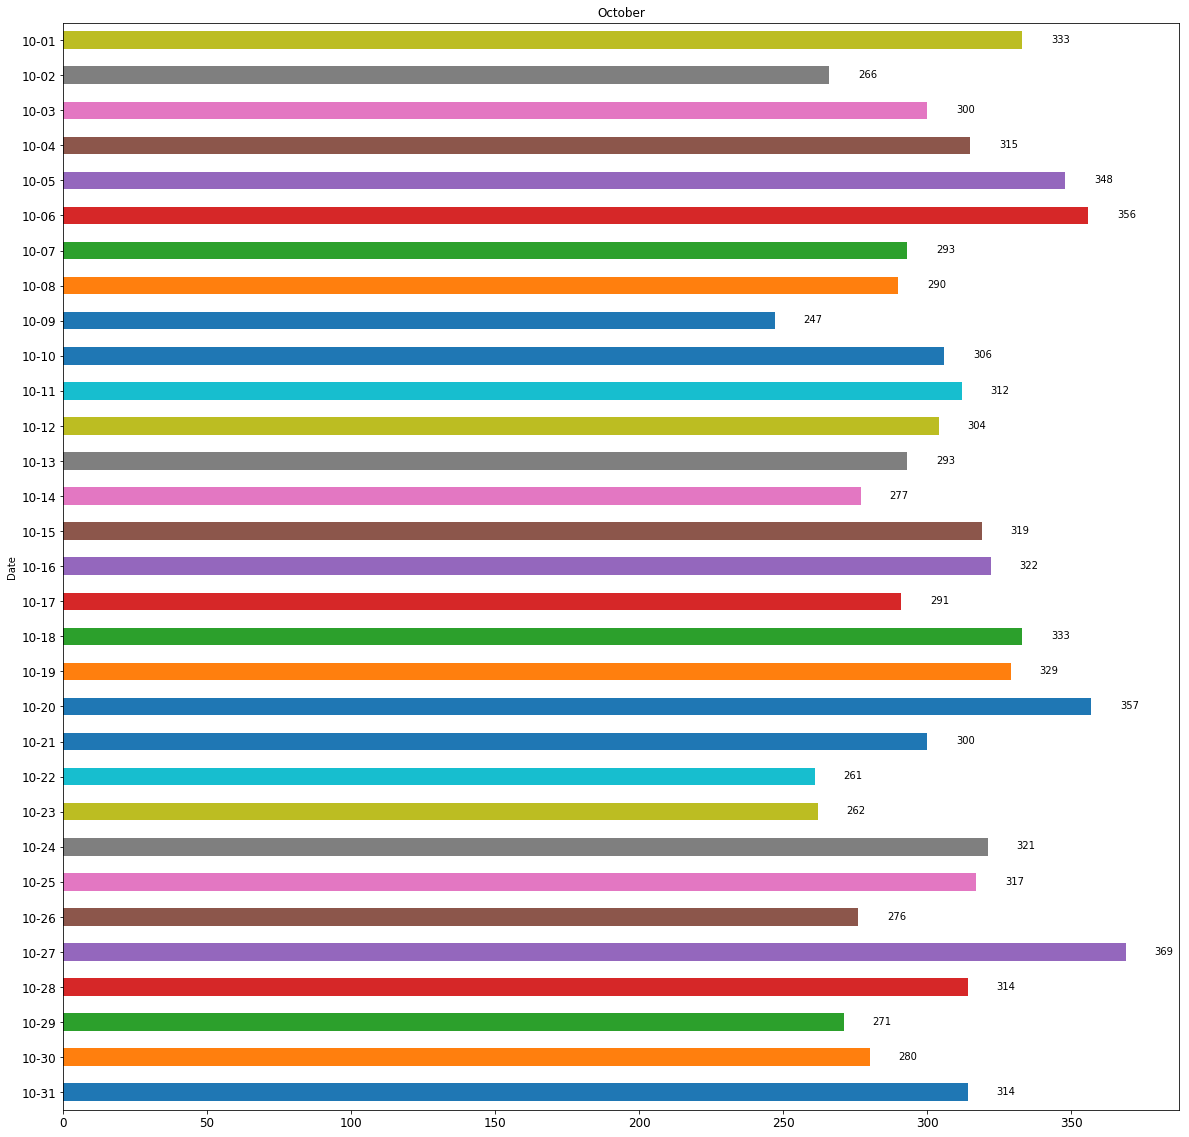

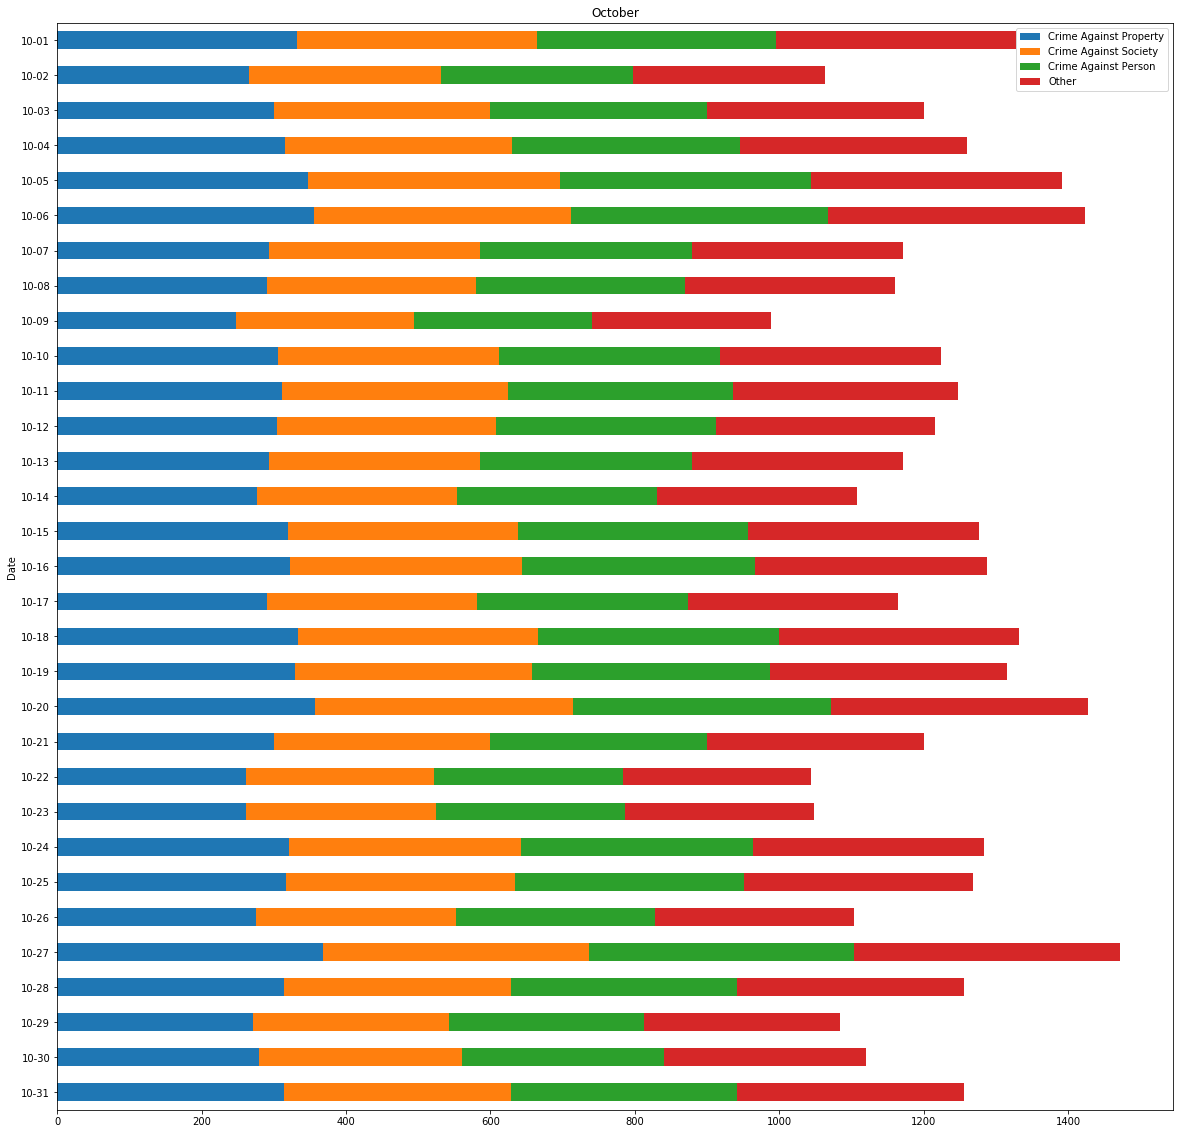

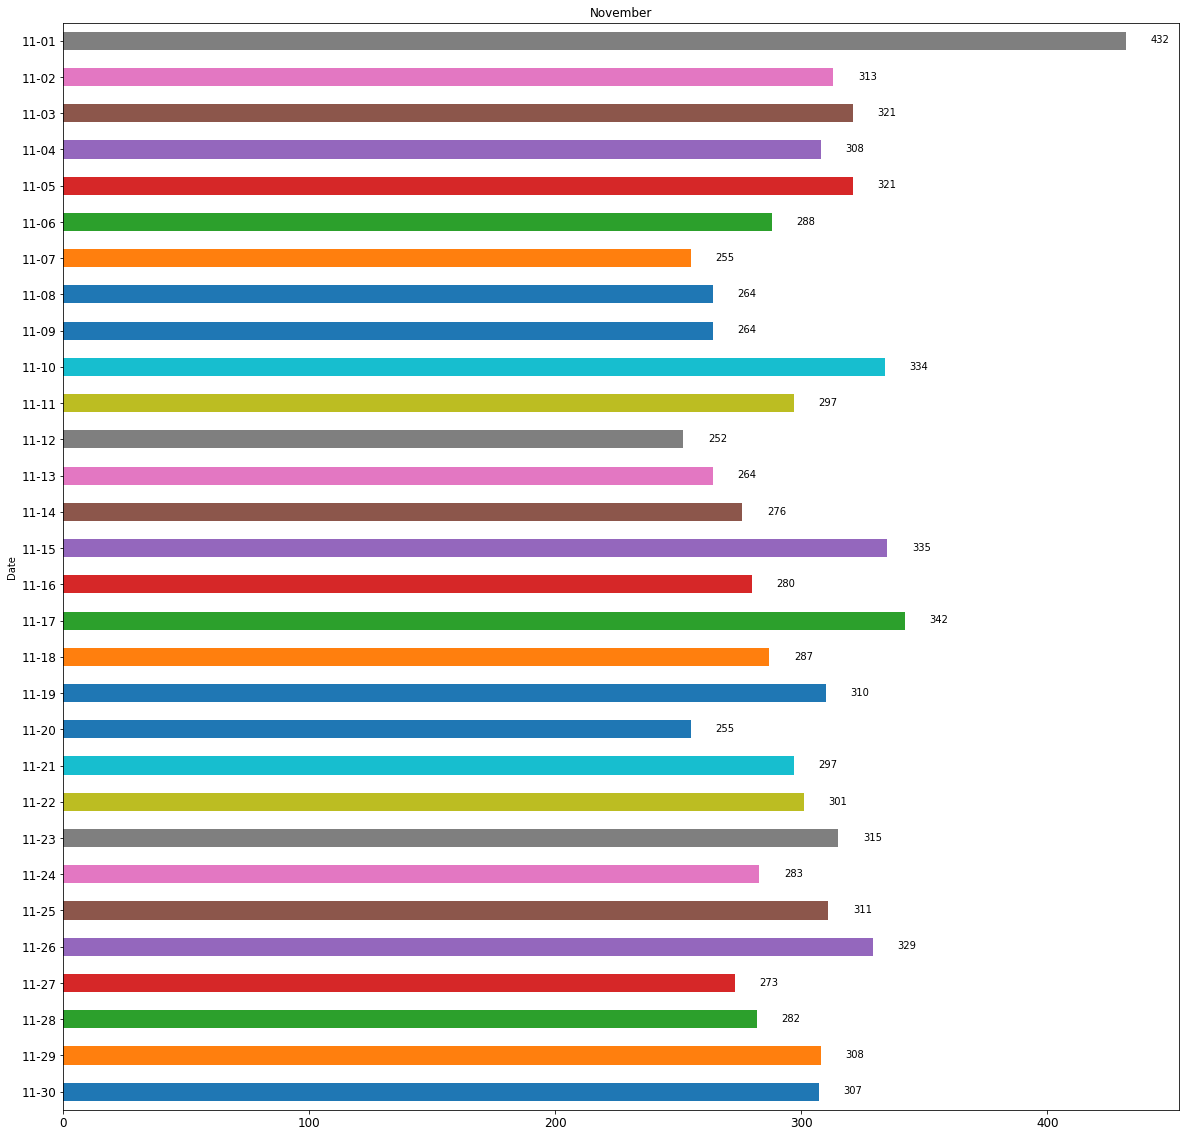

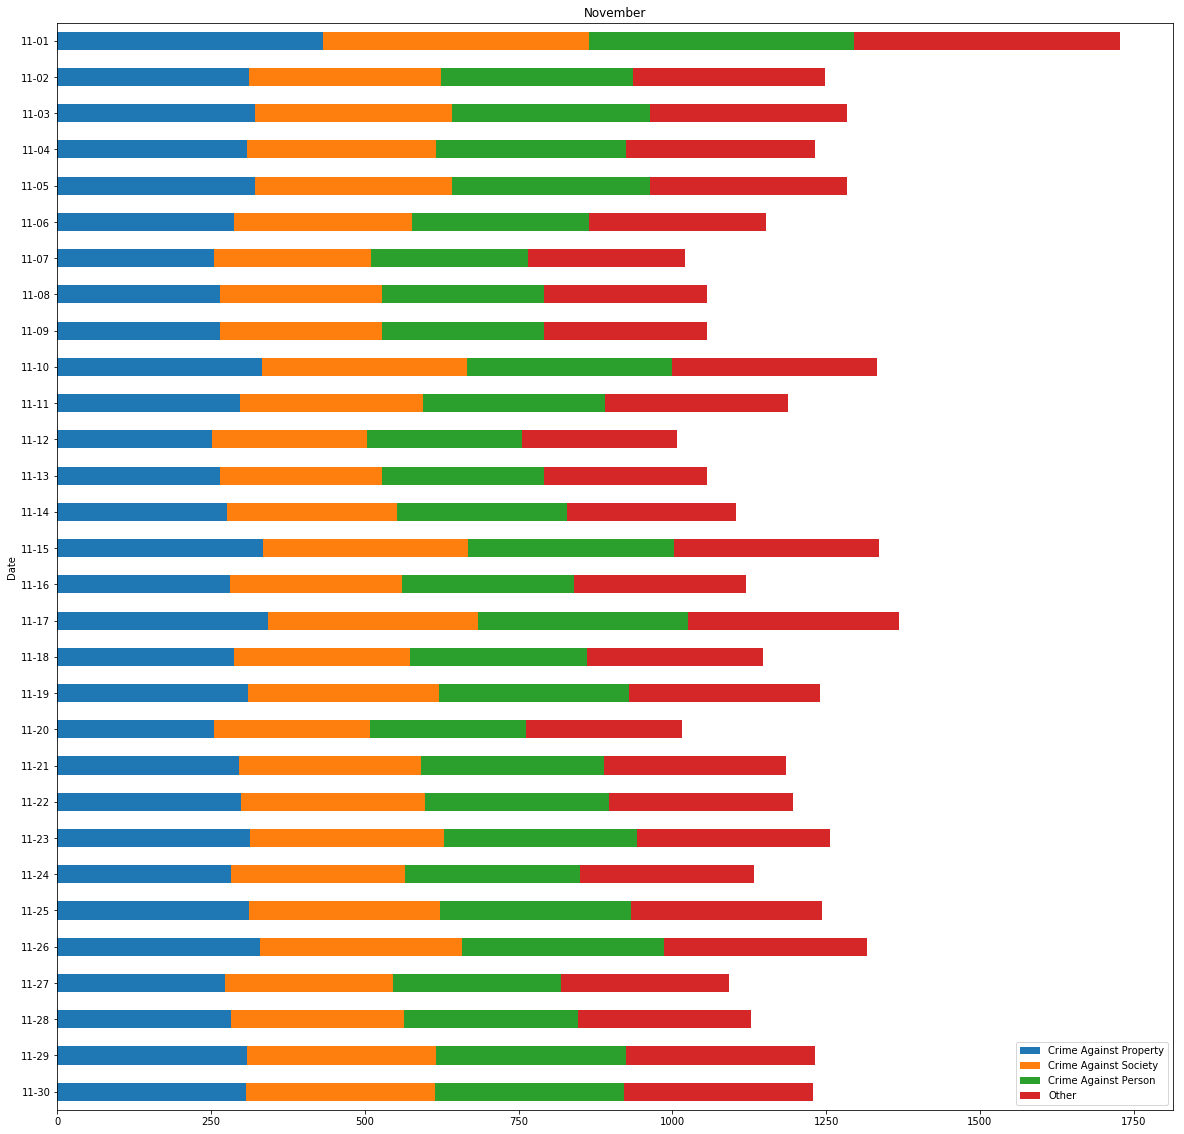

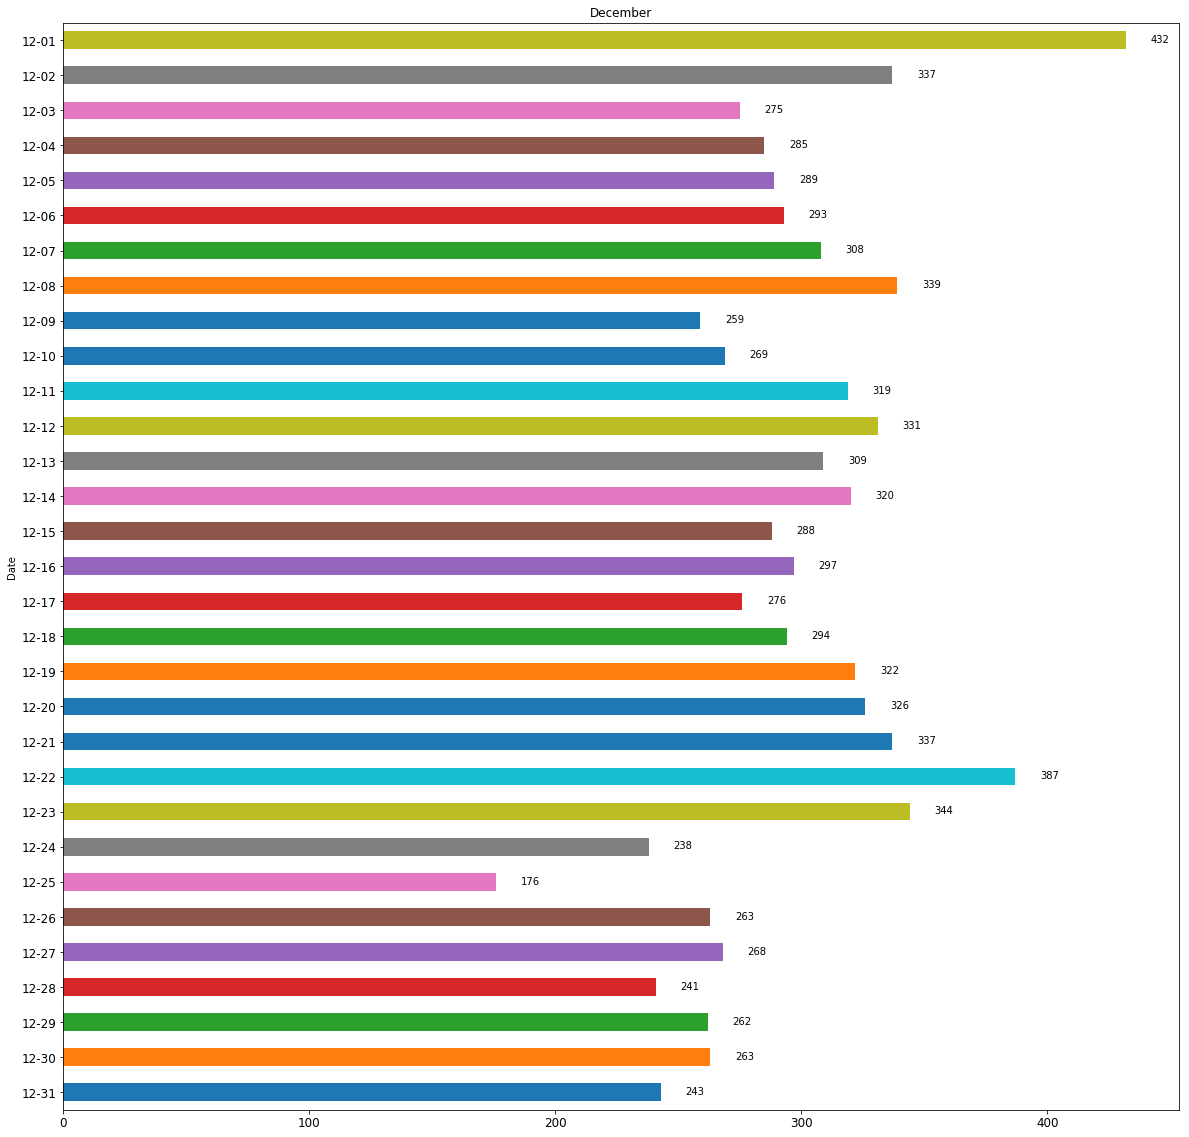

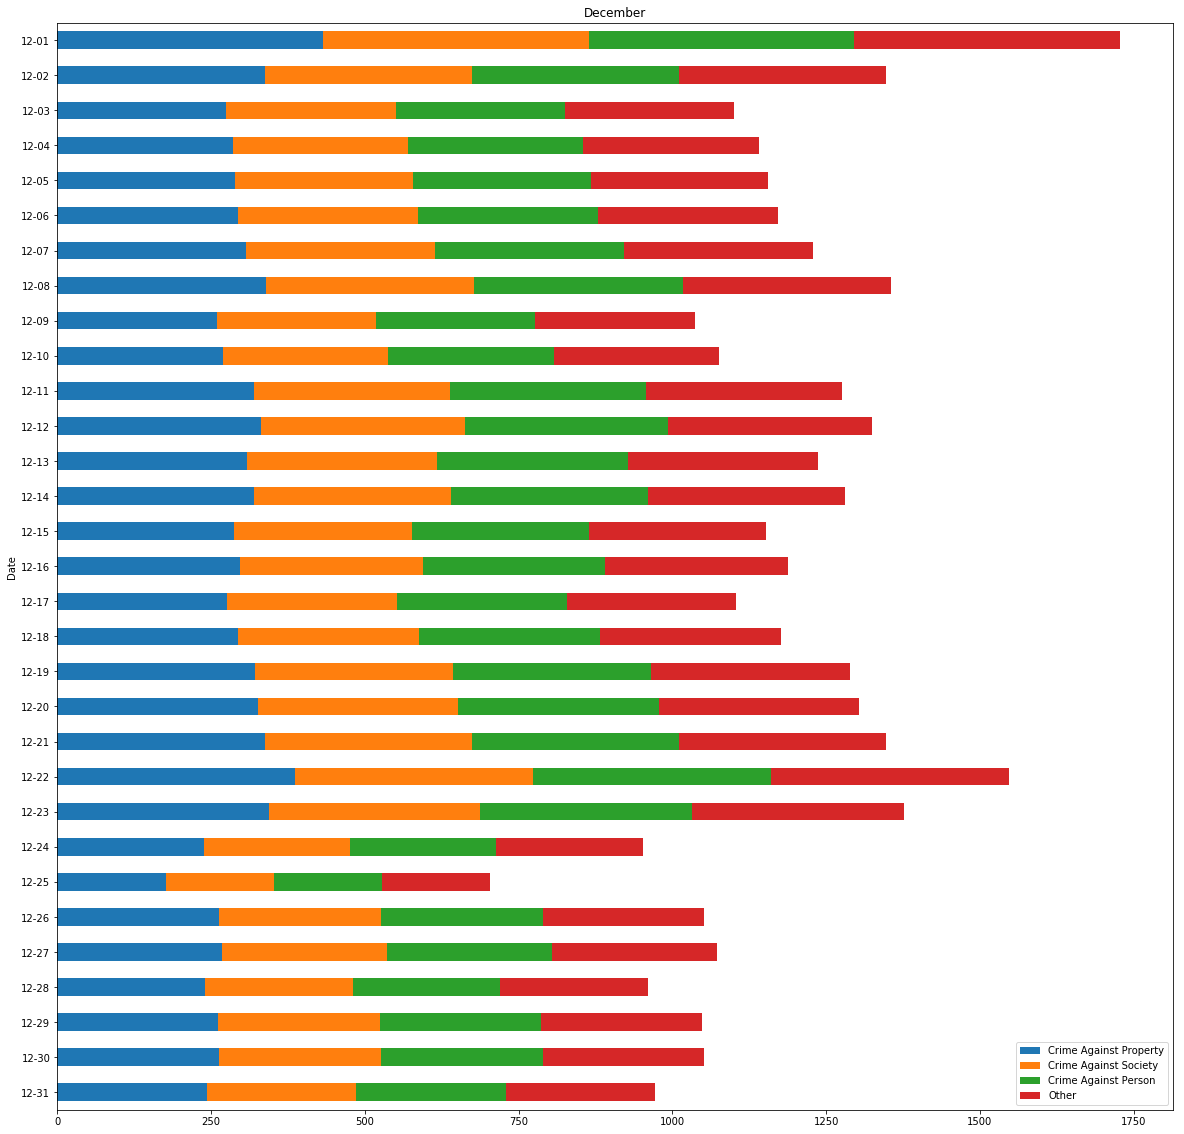

In [88]:
monthh(jan,"January")
monthh(feb,"February")
monthh(mar,"March")
monthh(apr,"April")
monthh(may,"May")
monthh(jun,"June")
monthh(jul,"July")
monthh(aug,"August")
monthh(sep,"September")
monthh(octo,"October")
monthh(nov,"November")
monthh(dec,"December")

In [89]:
ugh =[]
ugh.append(jan['count'].sum())
ugh.append(feb['count'].sum())
ugh.append(mar['count'].sum())
ugh.append(apr['count'].sum())
ugh.append(may['count'].sum())
ugh.append(jun['count'].sum())
ugh.append(jul['count'].sum())
ugh.append(aug['count'].sum())
ugh.append(sep['count'].sum())
ugh.append(octo['count'].sum())
ugh.append(nov['count'].sum())
ugh.append(dec['count'].sum())

ughh =[]
ughh.append(jan['Crime Against Property'].sum())
ughh.append(feb['Crime Against Property'].sum())
ughh.append(mar['Crime Against Property'].sum())
ughh.append(apr['Crime Against Property'].sum())
ughh.append(may['Crime Against Property'].sum())
ughh.append(jun['Crime Against Property'].sum())
ughh.append(jul['Crime Against Property'].sum())
ughh.append(aug['Crime Against Property'].sum())
ughh.append(sep['Crime Against Property'].sum())
ughh.append(octo['Crime Against Property'].sum())
ughh.append(nov['Crime Against Property'].sum())
ughh.append(dec['Crime Against Property'].sum())

ughhh =[]
ughhh.append(jan['Crime Against Society'].sum())
ughhh.append(feb['Crime Against Society'].sum())
ughhh.append(mar['Crime Against Society'].sum())
ughhh.append(apr['Crime Against Society'].sum())
ughhh.append(may['Crime Against Society'].sum())
ughhh.append(jun['Crime Against Society'].sum())
ughhh.append(jul['Crime Against Society'].sum())
ughhh.append(aug['Crime Against Society'].sum())
ughhh.append(sep['Crime Against Society'].sum())
ughhh.append(octo['Crime Against Society'].sum())
ughhh.append(nov['Crime Against Society'].sum())
ughhh.append(dec['Crime Against Society'].sum())

ughhhh =[]
ughhhh.append(jan['Crime Against Person'].sum())
ughhhh.append(feb['Crime Against Person'].sum())
ughhhh.append(mar['Crime Against Person'].sum())
ughhhh.append(apr['Crime Against Person'].sum())
ughhhh.append(may['Crime Against Person'].sum())
ughhhh.append(jun['Crime Against Person'].sum())
ughhhh.append(jul['Crime Against Person'].sum())
ughhhh.append(aug['Crime Against Person'].sum())
ughhhh.append(sep['Crime Against Person'].sum())
ughhhh.append(octo['Crime Against Person'].sum())
ughhhh.append(nov['Crime Against Person'].sum())
ughhhh.append(dec['Crime Against Person'].sum())

ughhhhh =[]
ughhhhh.append(jan['Other'].sum())
ughhhhh.append(feb['Other'].sum())
ughhhhh.append(mar['Other'].sum())
ughhhhh.append(apr['Other'].sum())
ughhhhh.append(may['Other'].sum())
ughhhhh.append(jun['Other'].sum())
ughhhhh.append(jul['Other'].sum())
ughhhhh.append(aug['Other'].sum())
ughhhhh.append(sep['Other'].sum())
ughhhhh.append(octo['Other'].sum())
ughhhhh.append(nov['Other'].sum())
ughhhhh.append(dec['Other'].sum())

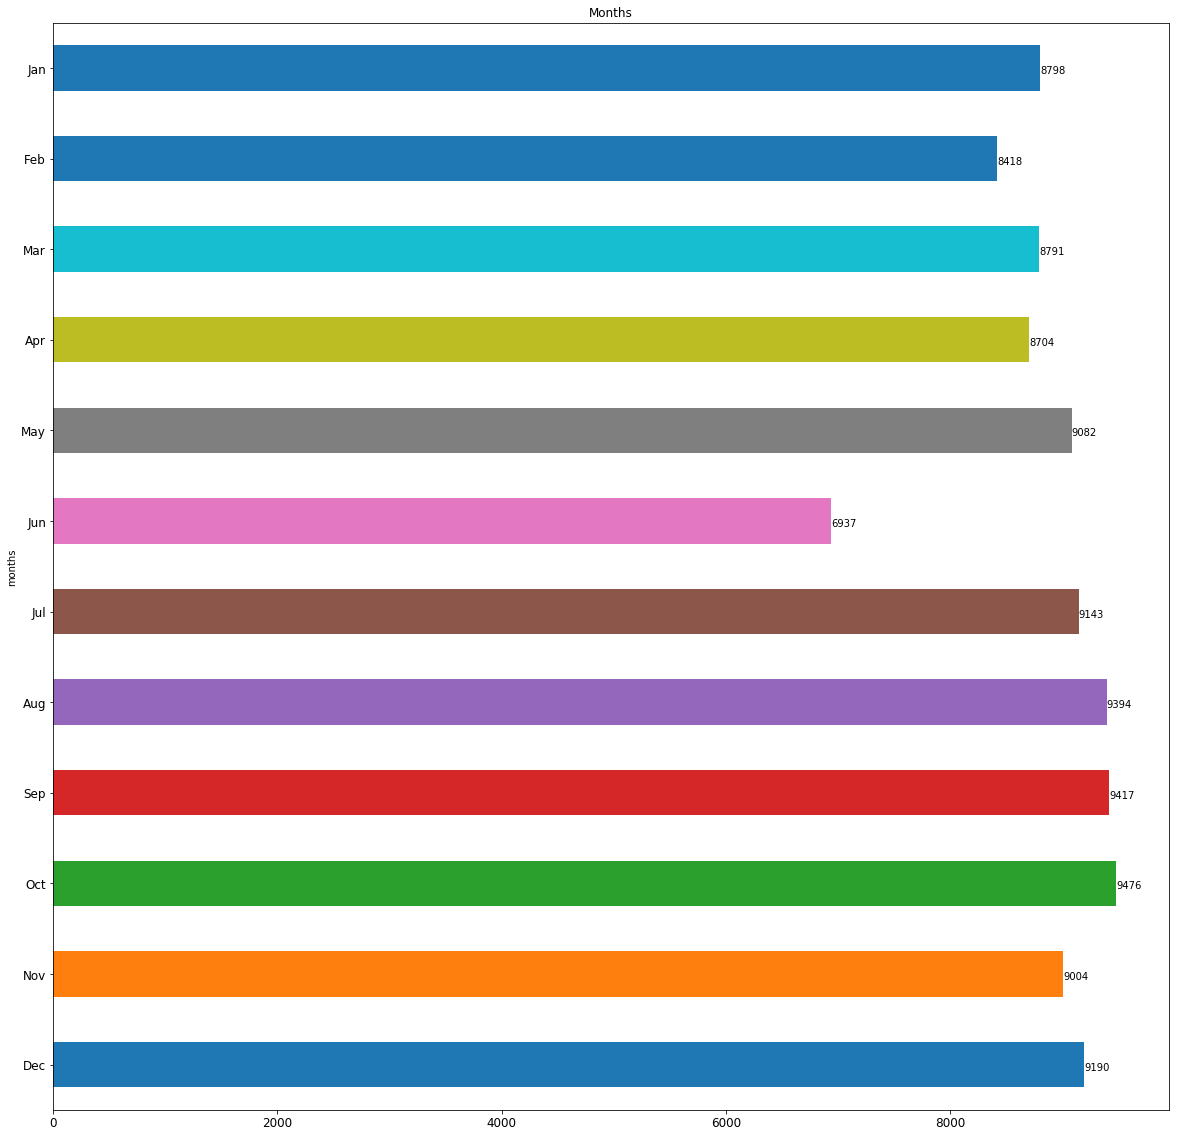

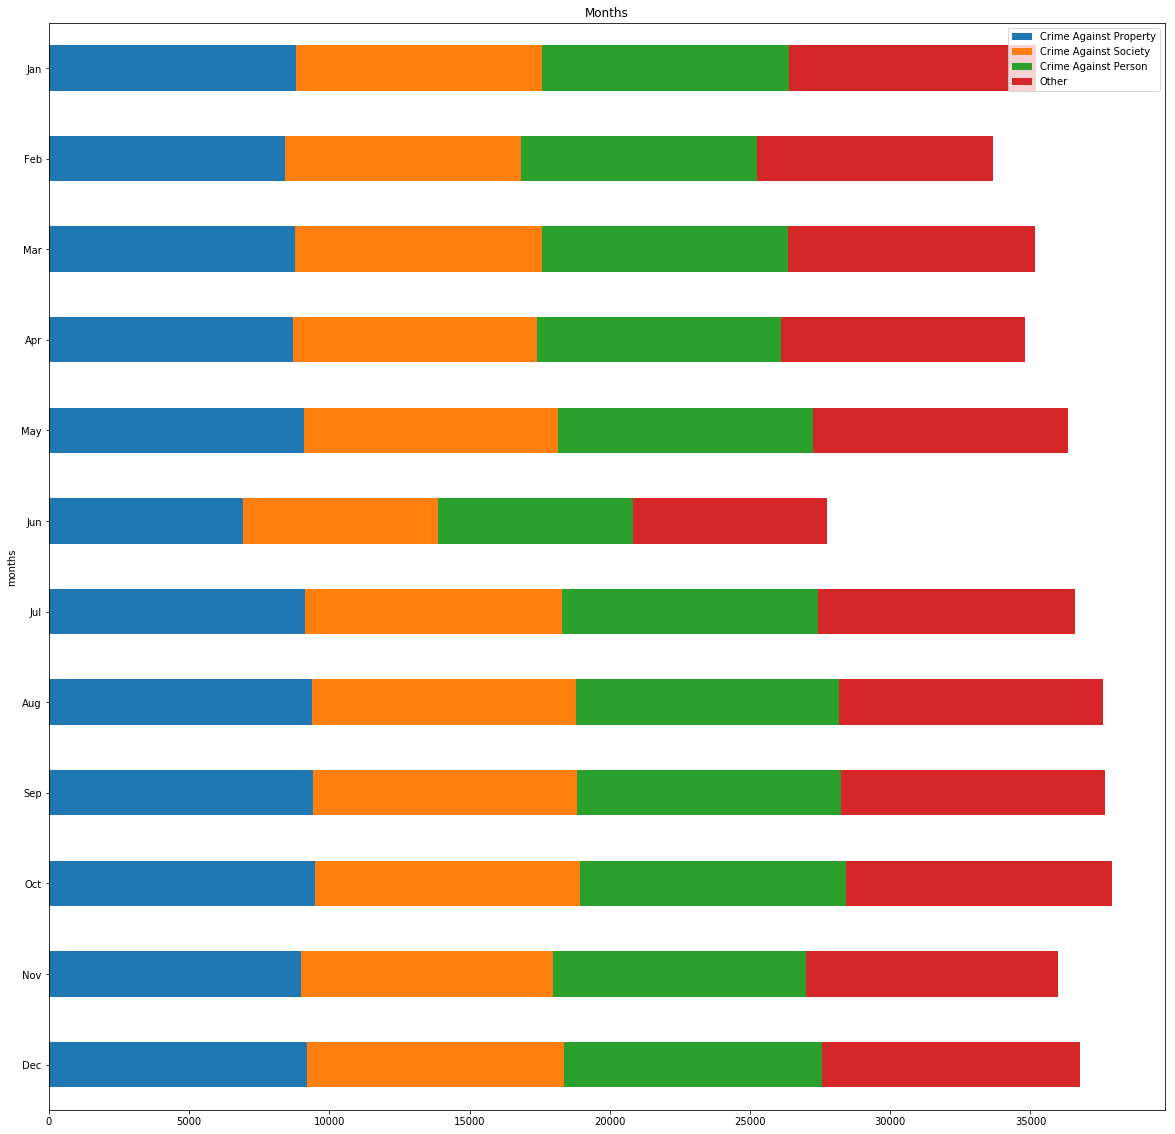

In [91]:
month = pd.DataFrame({"months": ["Jan",'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 'counts':ugh, "Crime Against Property":ughh, "Crime Against Society":ughhh,'Crime Against Person':ughhhh,'Other':ughhhh})
ax = month.iloc[::-1].plot(x = 'months', y = 'counts', kind = 'barh', figsize = (20,20),title = 'Months', legend = False, fontsize = 12)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.19,str(i.get_width()))
ugh = month["counts"]
month = month.drop(["counts"],axis = 1)
ax = month.iloc[::-1].plot.barh(figsize = (20,20),stacked = True,x = 'months',title = "Months")
month["counts"] = ugh

In [92]:
print(date)

      Date month day  Crime Against Property  Crime Against Society  \
339  12-31    12  31                     243                    243   
295  12-30    12  30                     263                    263   
299  12-29    12  29                     262                    262   
342  12-28    12  28                     240                    240   
281  12-27    12  27                     268                    268   
294  12-26    12  26                     263                    263   
355  12-25    12  25                     176                    176   
344  12-24    12  24                     238                    238   
23   12-23    12  23                     344                    344   
6    12-22    12  22                     387                    387   
33   12-21    12  21                     337                    337   
55   12-20    12  20                     326                    326   
71   12-19    12  19                     322                    322   
182  1

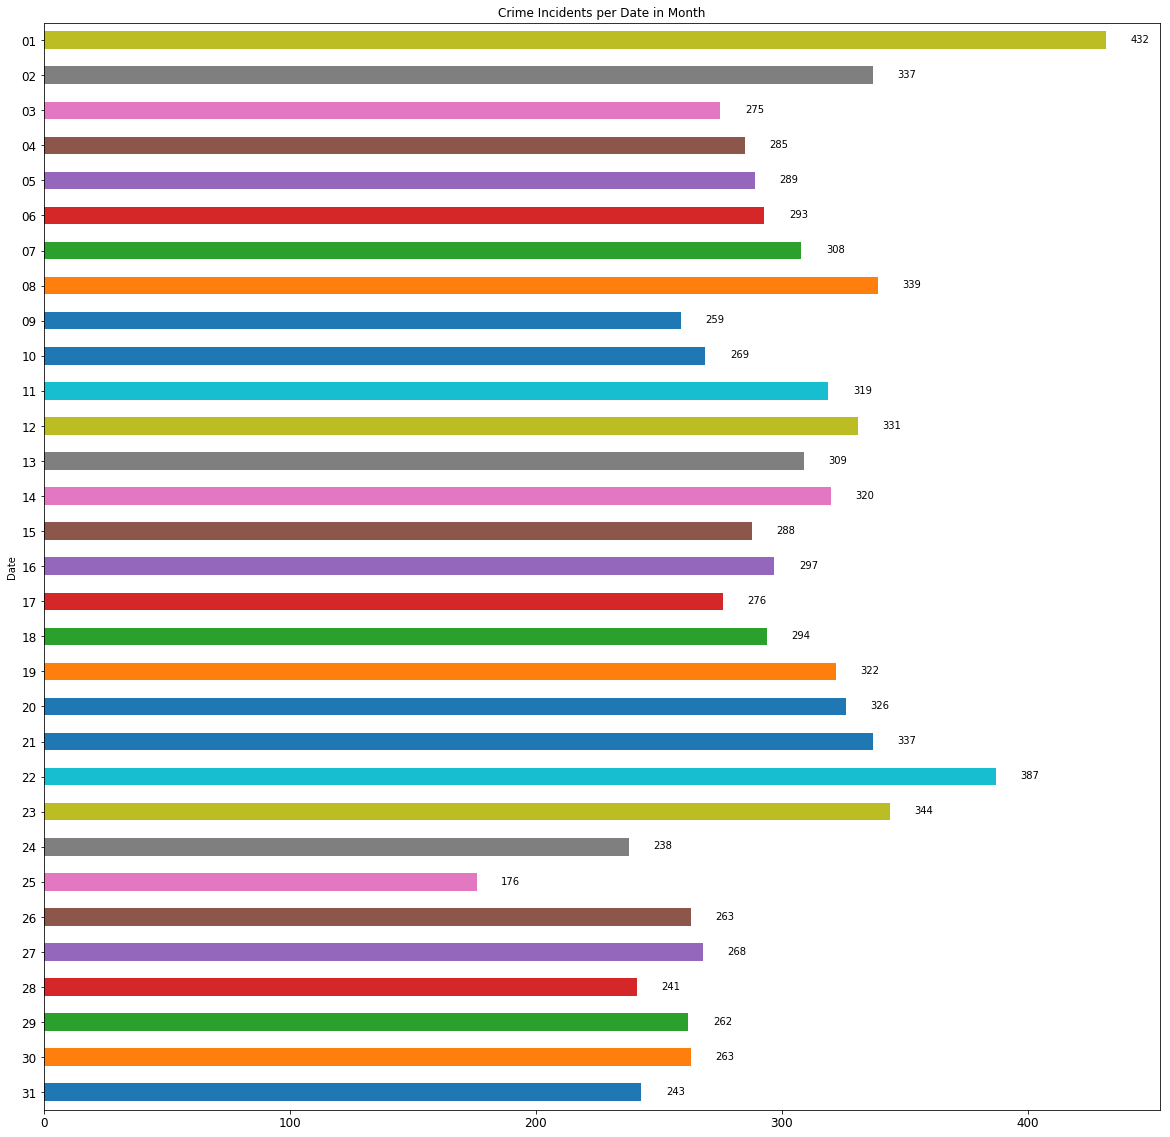

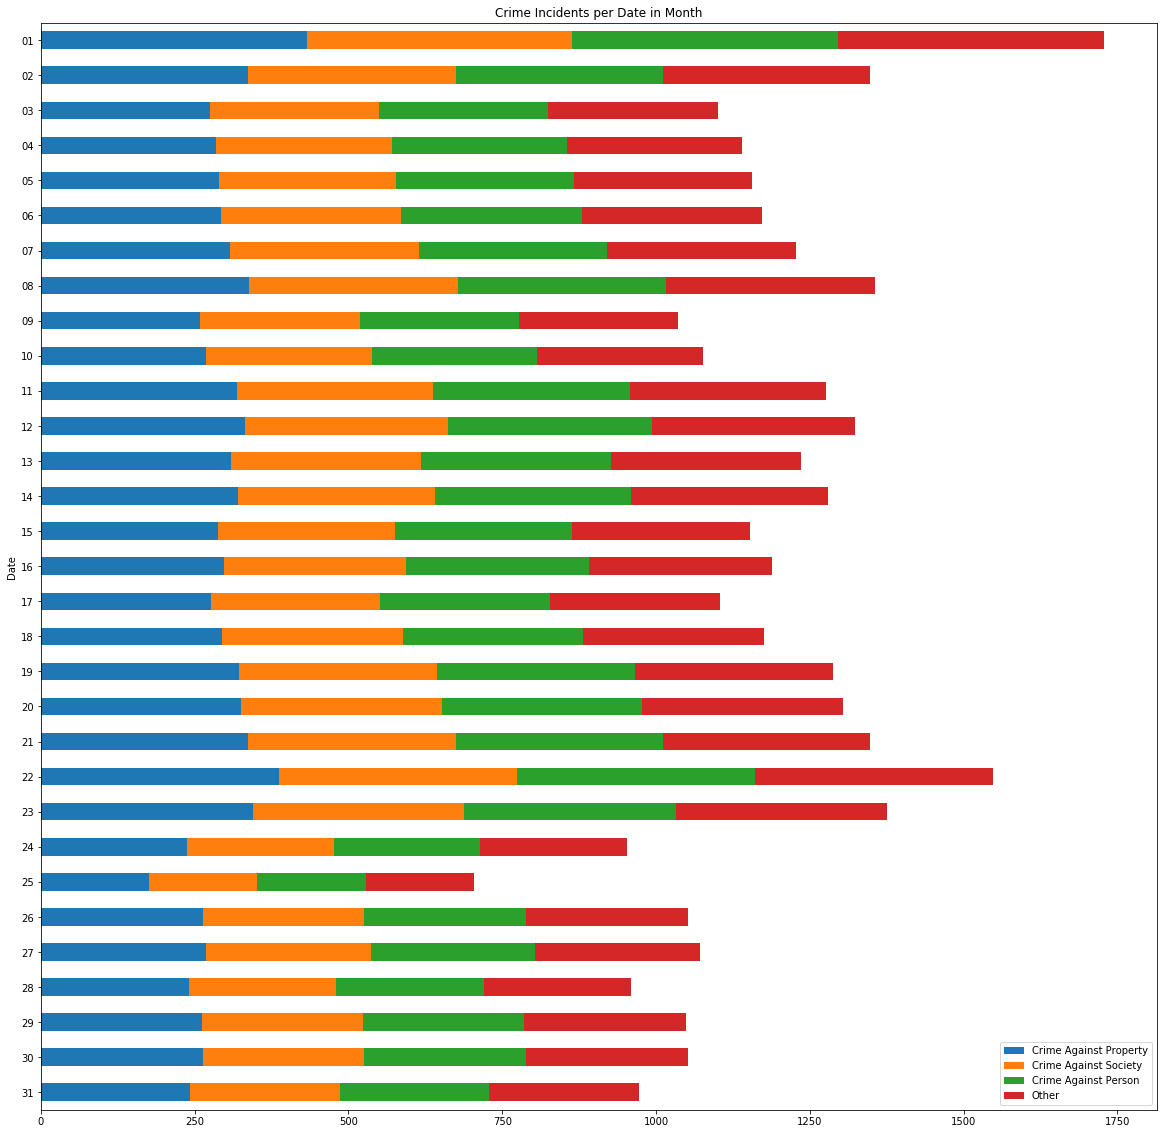

In [93]:
daynum = list(map(str, date['day'].value_counts().keys().tolist()))
daynum.sort()
#daycount.insert(0, 0)
datte = pd.DataFrame({'Date':daynum,'count':daycount,'Crime Against Property':cap,'Crime Against Society':cas,'Crime Against Person':capp,"Other":oth})
datebar = (datte).sort_values(['Date'])
datebar = datebar.iloc[::-1]
ax = datebar.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (20,20),title = 'Crime Incidents per Date in Month', legend = False, fontsize = 12)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.19,str(i.get_width()))
ugh = datebar["count"]
datebar = datebar.drop(["count"],axis = 1)
ax = datebar.plot.barh(figsize = (20,20),stacked = True,x = 'Date',title = 'Crime Incidents per Date in Month')
datebar["count"] = ugh

In [94]:
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh

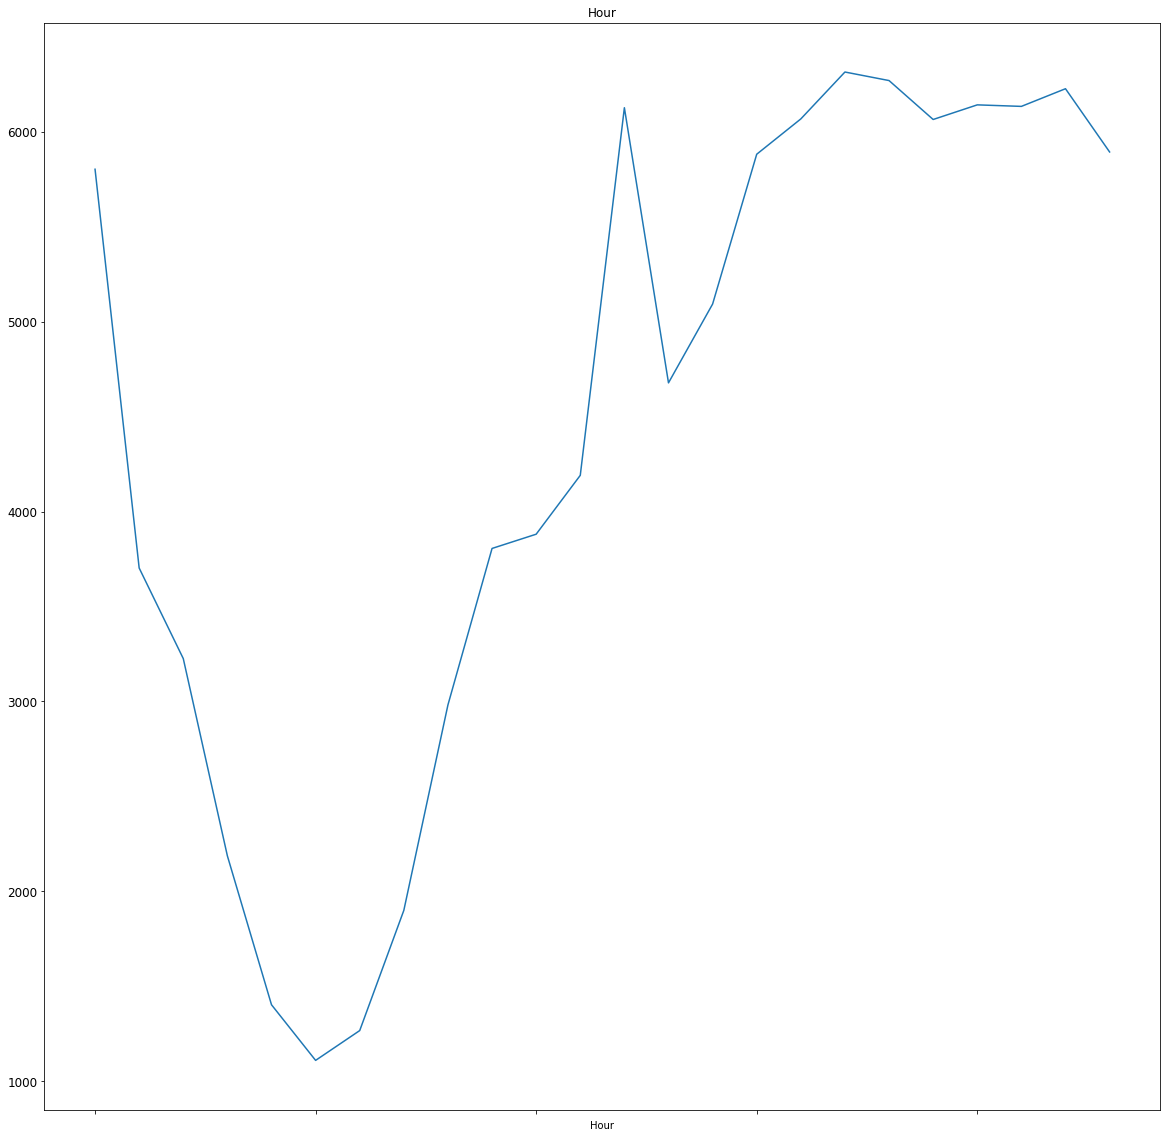

In [96]:
hourvalues = list(map(str, data['Start Time'].value_counts().keys().tolist()))
hourcounts = list(map(int, data['Start Time'].value_counts().tolist()))
ughh = []
ughhh = []
hour = pd.DataFrame({'Hour':hourvalues,'count':hourcounts})
hourbar = hour.sort_values(['Hour'])
hourbar = hourbar.drop([24],axis = 0)
ax = hourbar.plot(x = 'Hour', y = 'count', kind = 'line', figsize = (20,20),title = 'Hour', legend = False, fontsize = 12)

In [97]:
zip20910 = data.loc[data["Zip Code"] == 20910.0]
zip20902 = data.loc[data["Zip Code"] == 20902.0]
zip20874 = data.loc[data["Zip Code"] == 20874.0]
zip20904 = data.loc[data["Zip Code"] == 20904.0]
zip20906 = data.loc[data["Zip Code"] == 20906.0]

In [98]:
def DUDE(array_key,array_value ):
    ugh = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(0,len(array_key)-1):
        ugh[int(array_key[i])] = array_value[i]
    return ugh

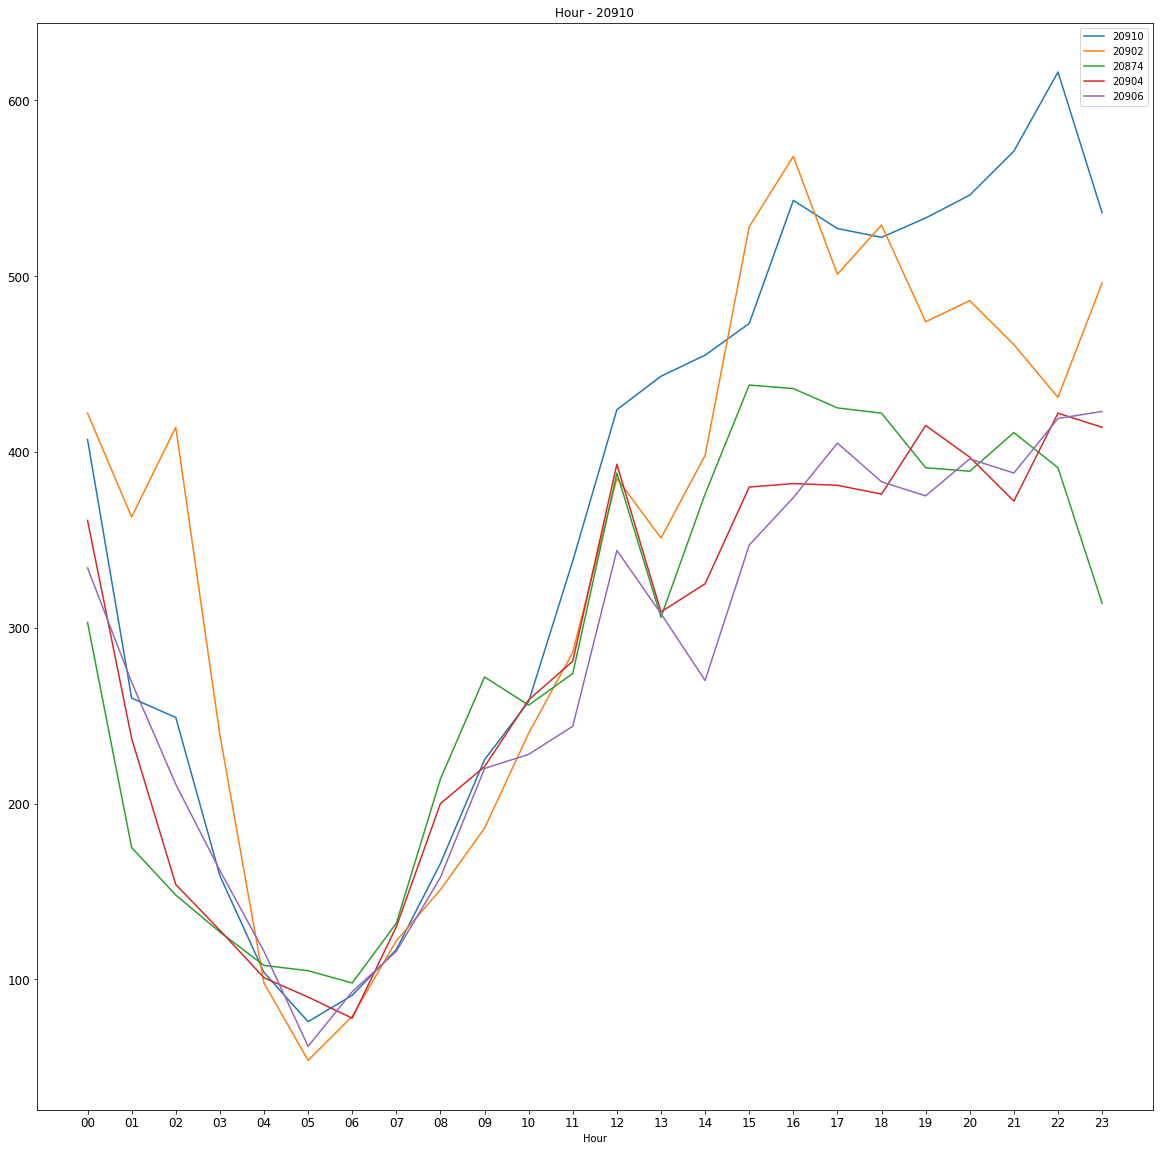

In [99]:
hourvalues = list(map(str, zip20910['Start Time'].value_counts().keys().tolist()))
hourcounts = DUDE(hourvalues, list(map(int, zip20910['Start Time'].value_counts().tolist())))
hourvalues2 = list(map(str, zip20902['Start Time'].value_counts().keys().tolist()))
hourcounts2 = DUDE(hourvalues2, list(map(int, zip20902['Start Time'].value_counts().tolist())))
hourvalues3 = list(map(str, zip20874['Start Time'].value_counts().keys().tolist()))
hourcounts3 = DUDE(hourvalues3, list(map(int, zip20874['Start Time'].value_counts().tolist())))
hourvalues4 = list(map(str, zip20904['Start Time'].value_counts().keys().tolist()))
hourcounts4 = DUDE(hourvalues4, list(map(int, zip20904['Start Time'].value_counts().tolist())))
hourvalues5 = list(map(str, zip20906['Start Time'].value_counts().keys().tolist()))
hourcounts5 = DUDE(hourvalues5, list(map(int, zip20906['Start Time'].value_counts().tolist())))
hourvalues.sort()
hour = pd.DataFrame({'Hour':hourvalues,'20910':hourcounts,'20902':hourcounts2,'20874':hourcounts3,'20904':hourcounts4,'20906':hourcounts5})
#hourbar = hour.sort_values(['Hour'])
hourbar = hour.drop([24],axis = 0)
ax = hourbar.plot(x = 'Hour', kind = 'line', figsize = (20,20),title = 'Hour - 20910', fontsize = 12, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

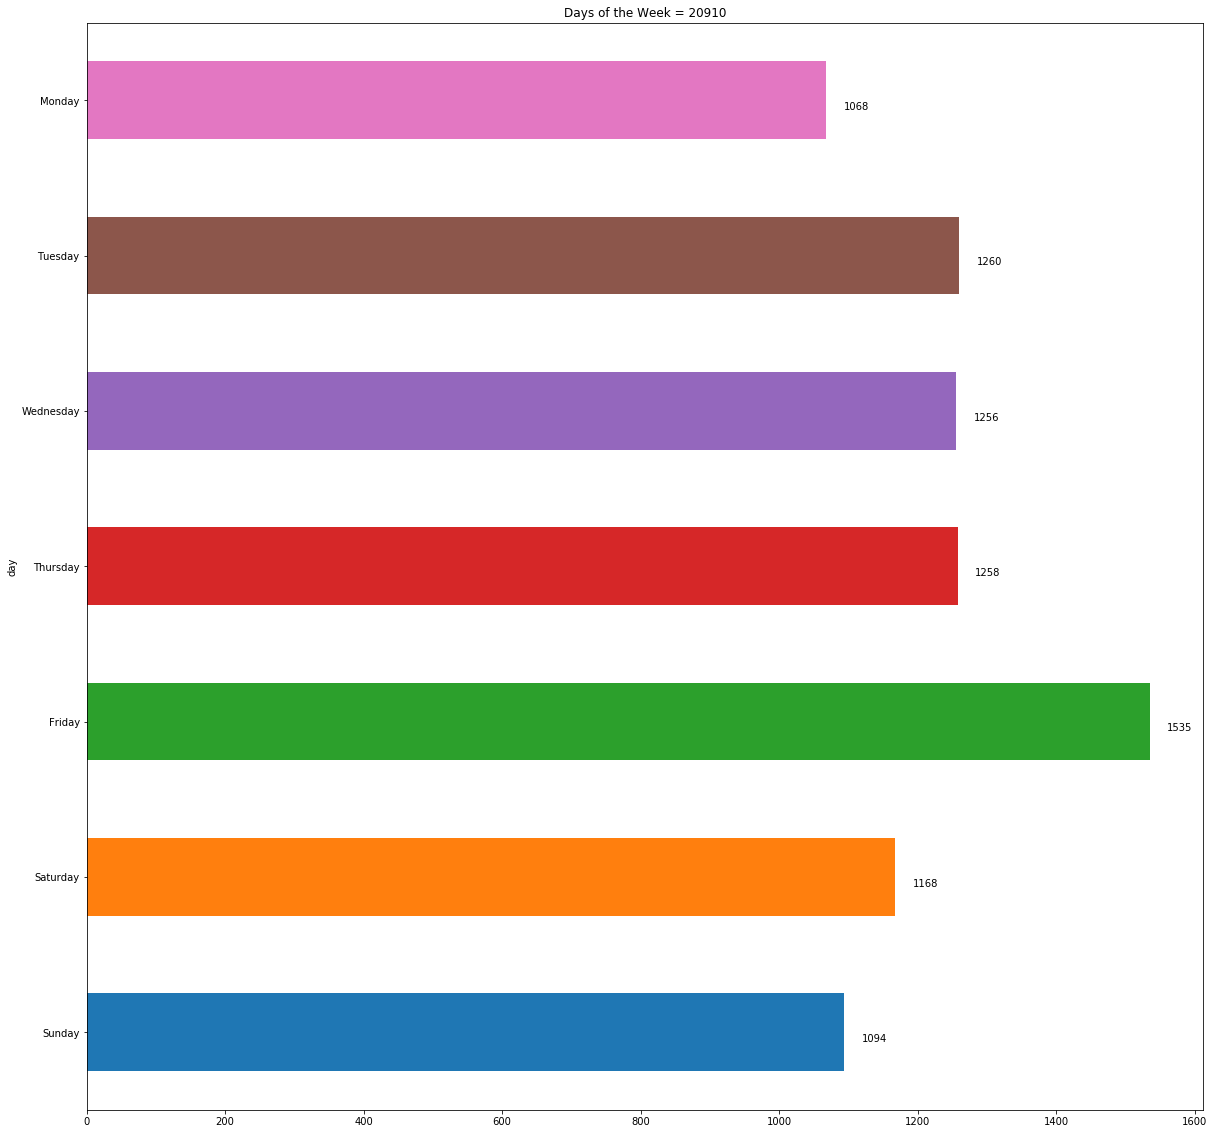

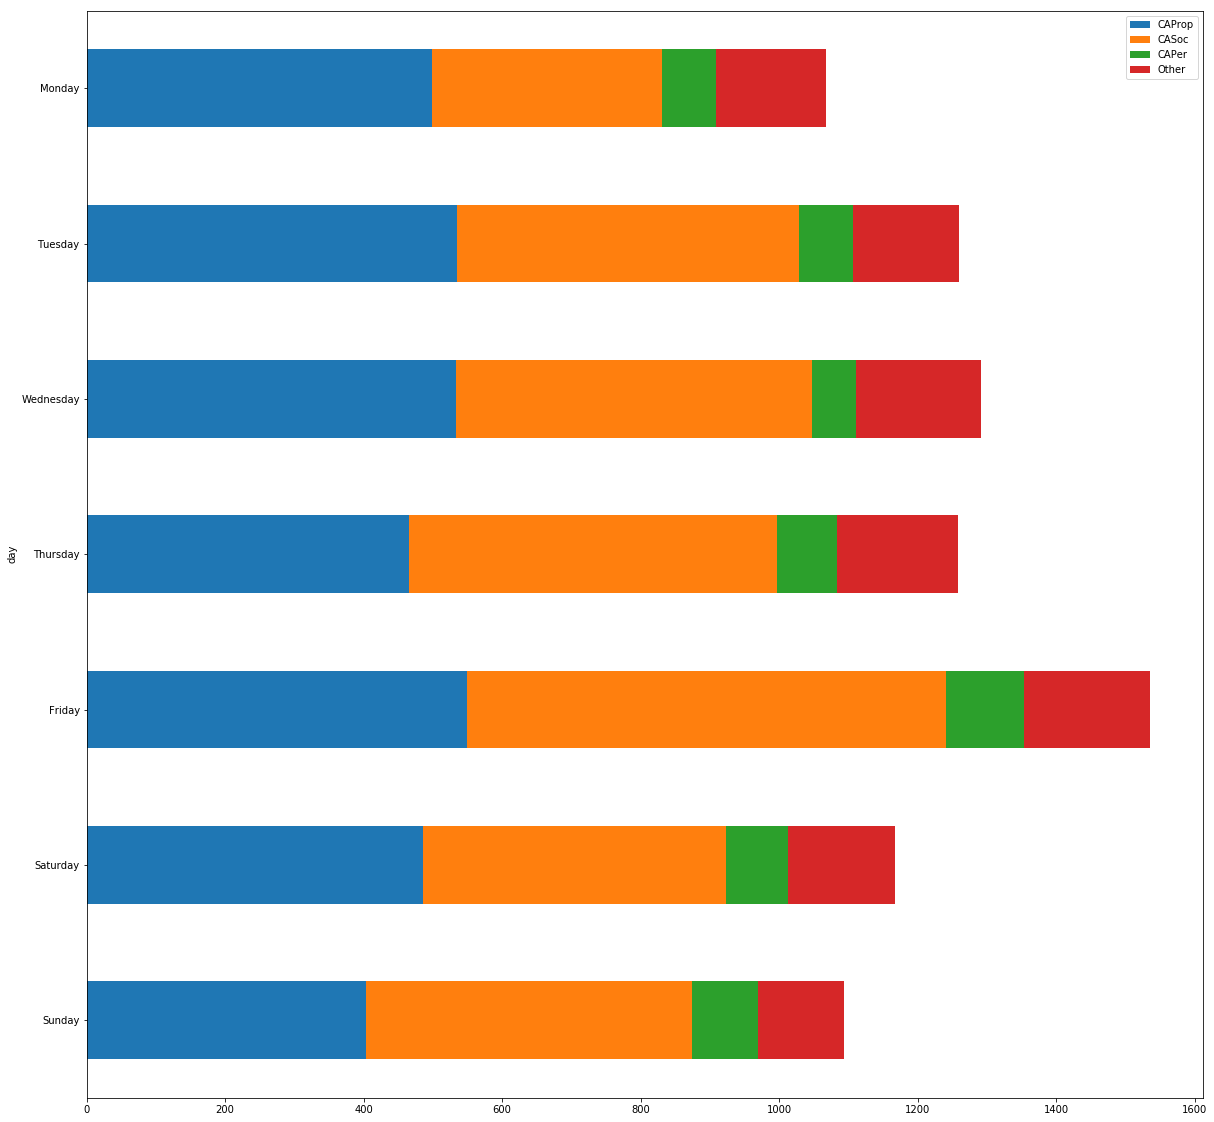

In [100]:
weekandcount(zip20910,25,"Days of the Week = 20910")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

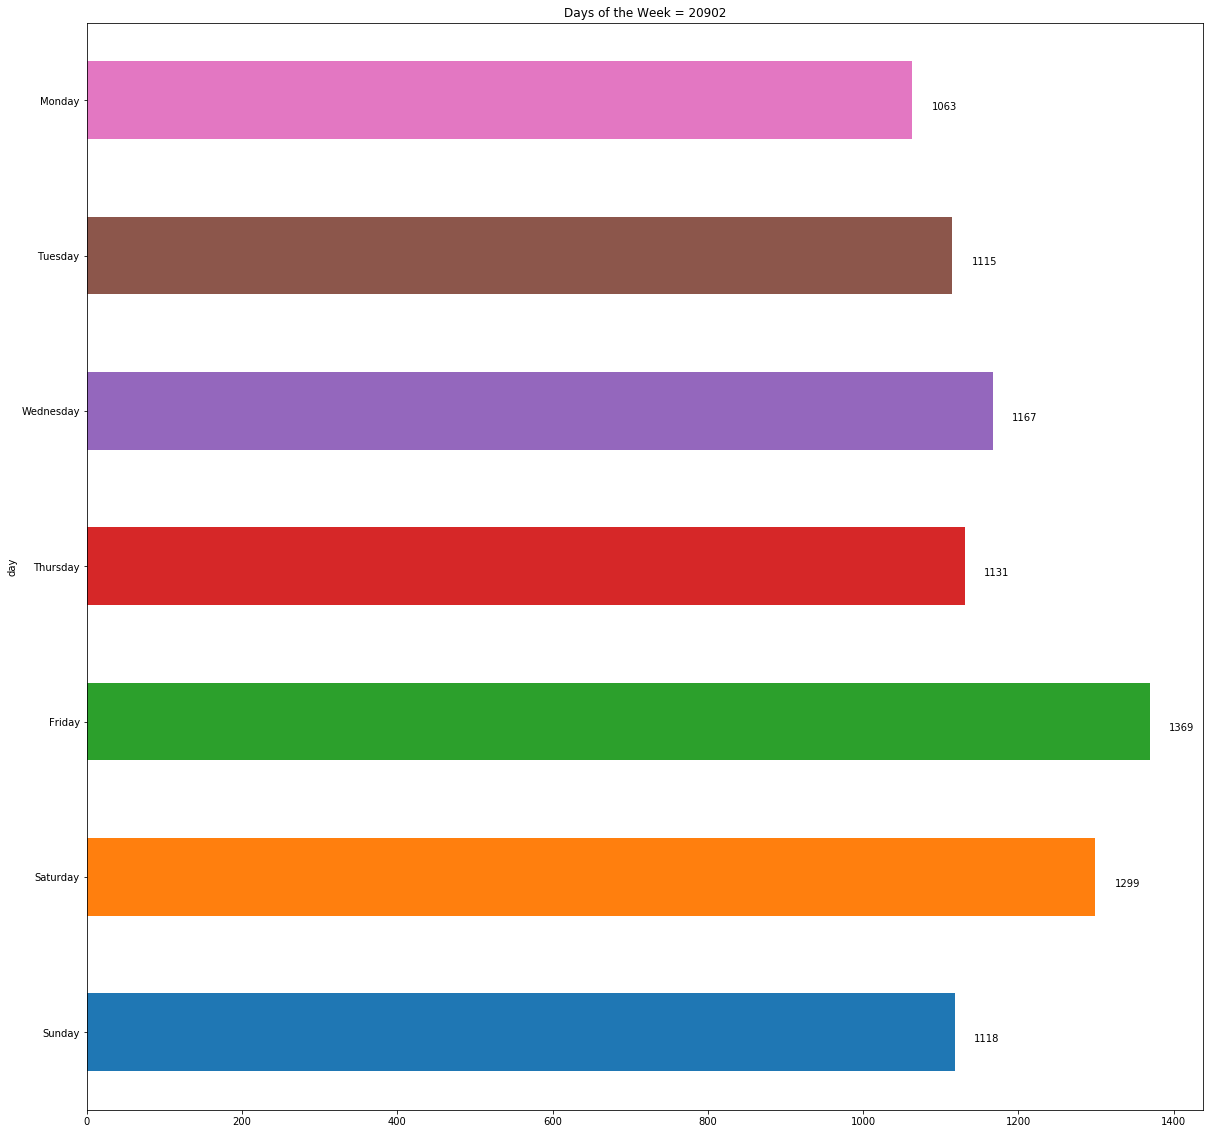

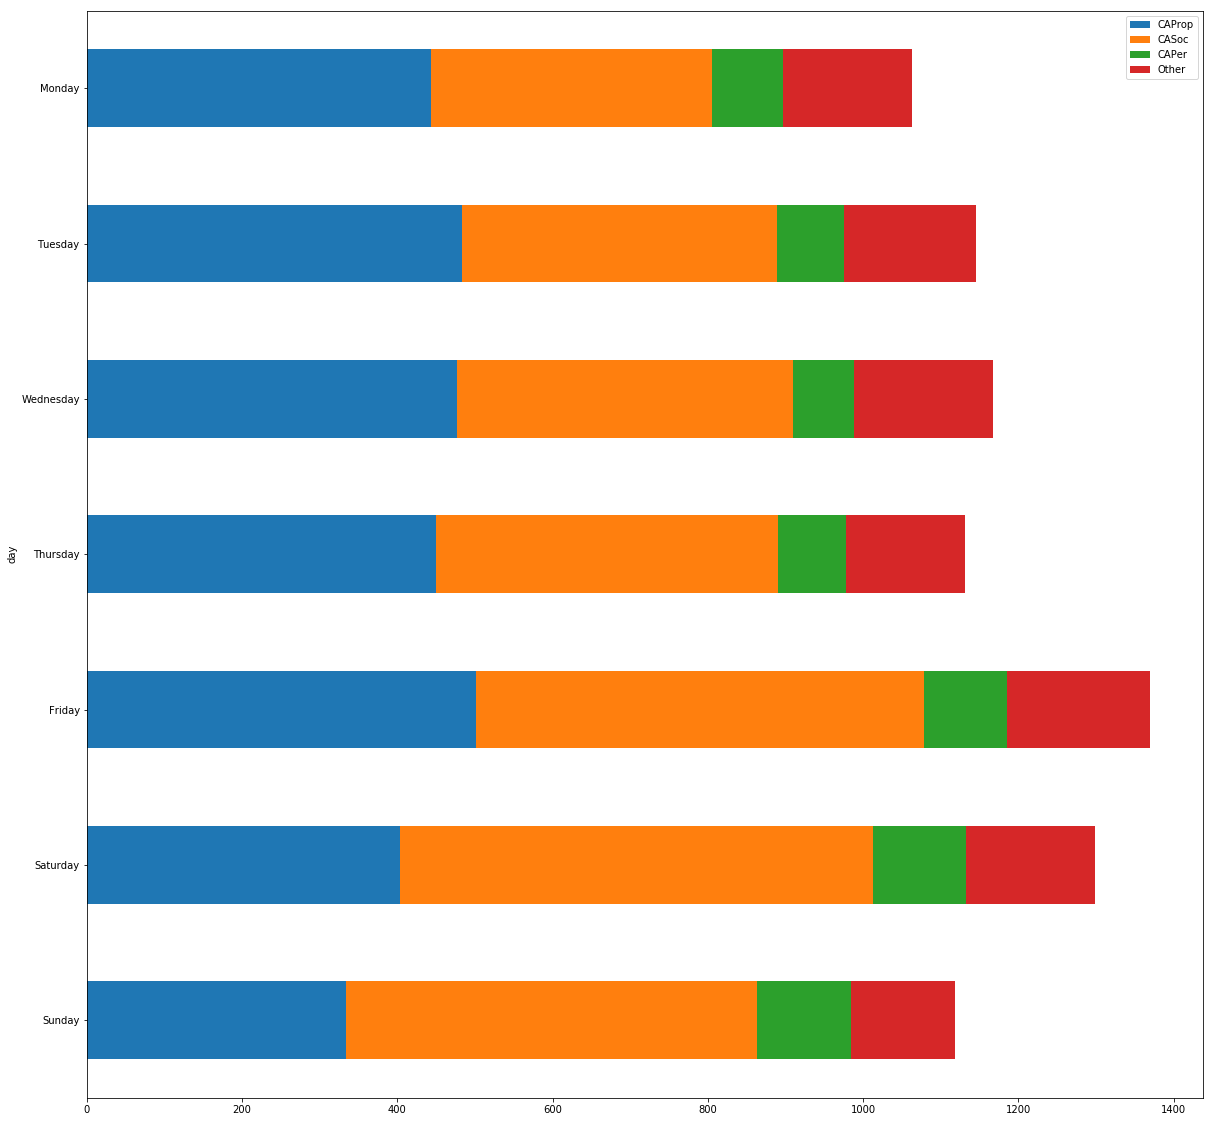

In [101]:
weekandcount(zip20902,25,"Days of the Week = 20902")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

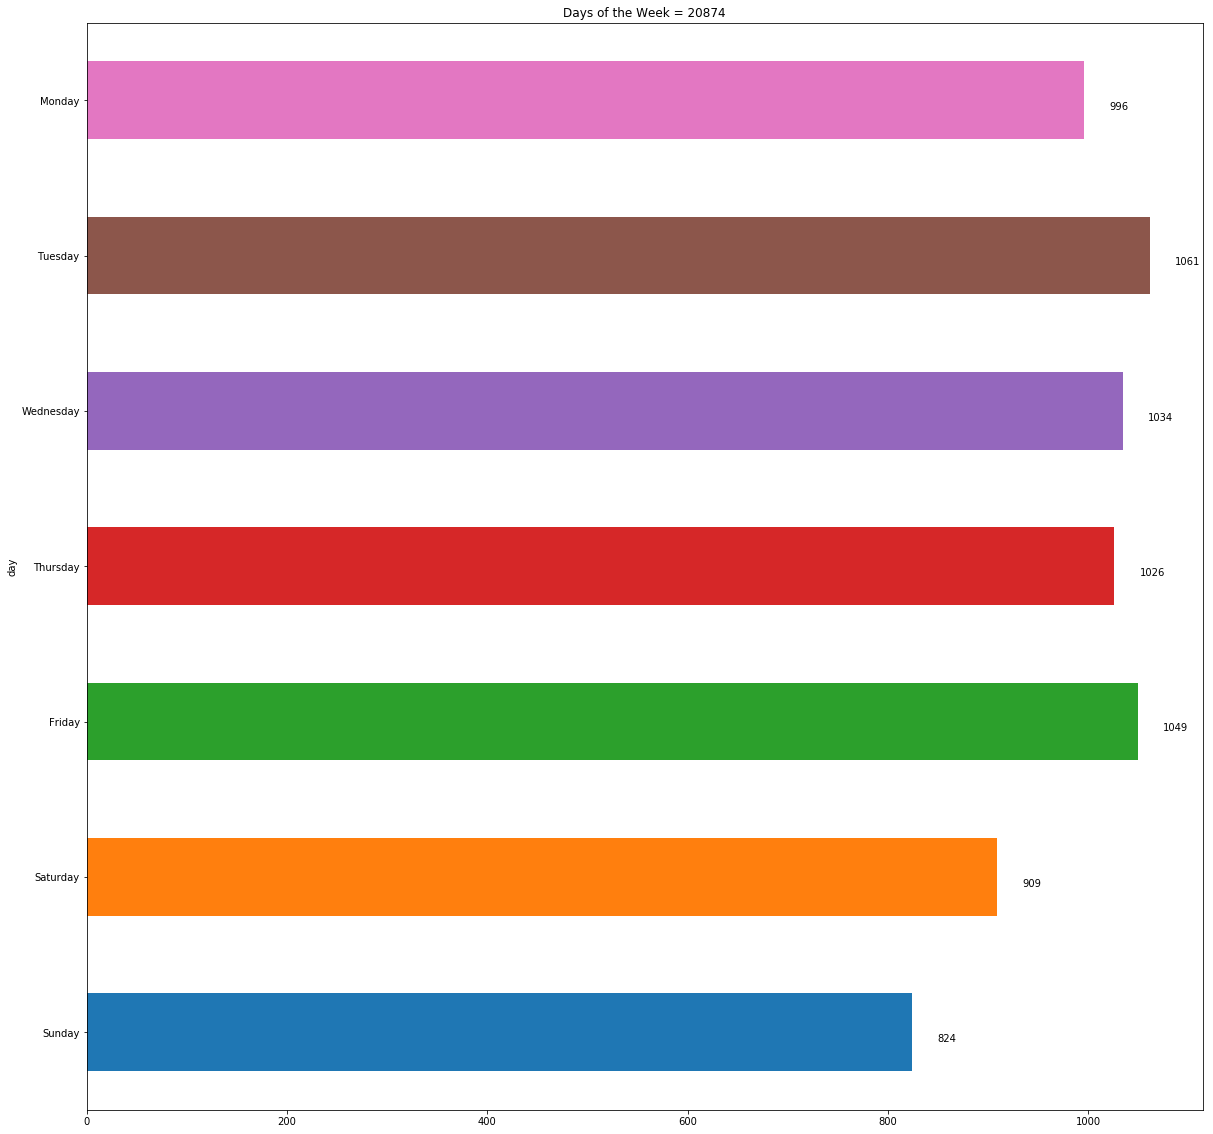

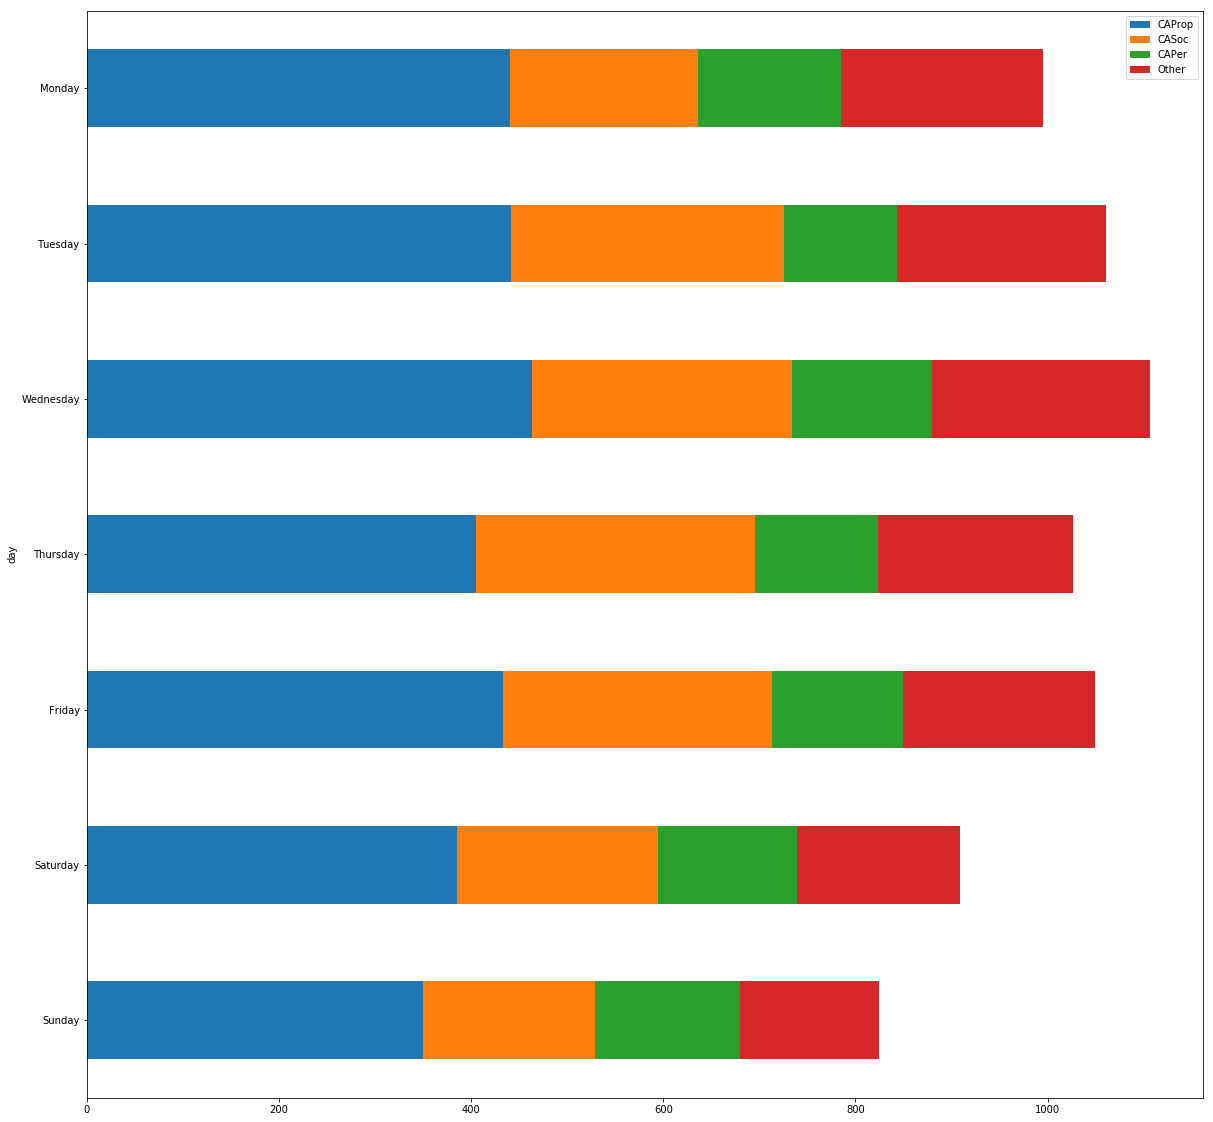

In [102]:
weekandcount(zip20874,25,"Days of the Week = 20874")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

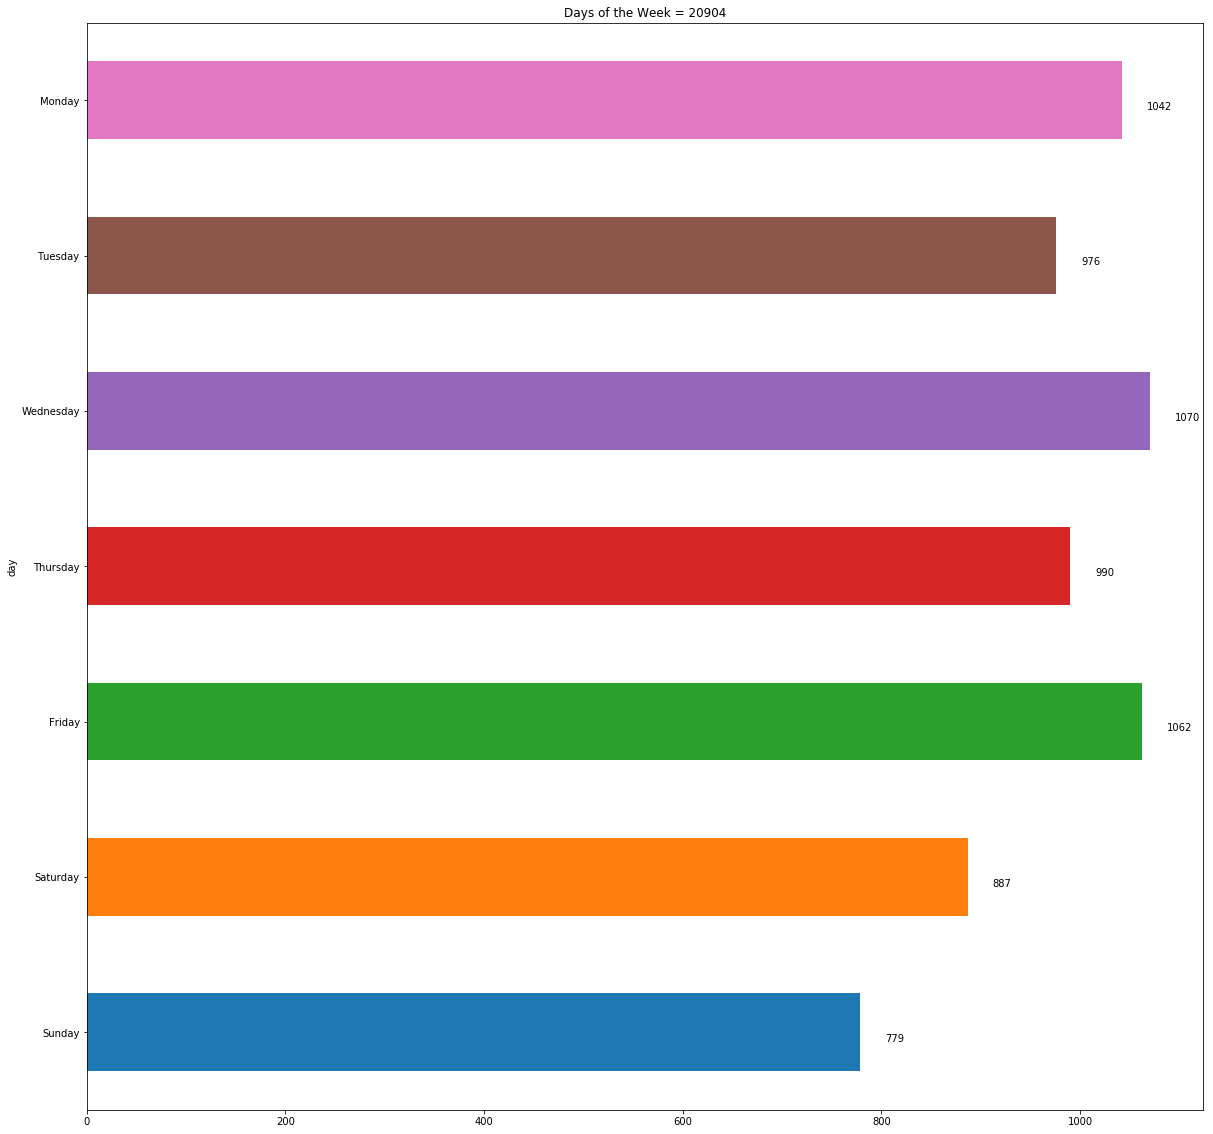

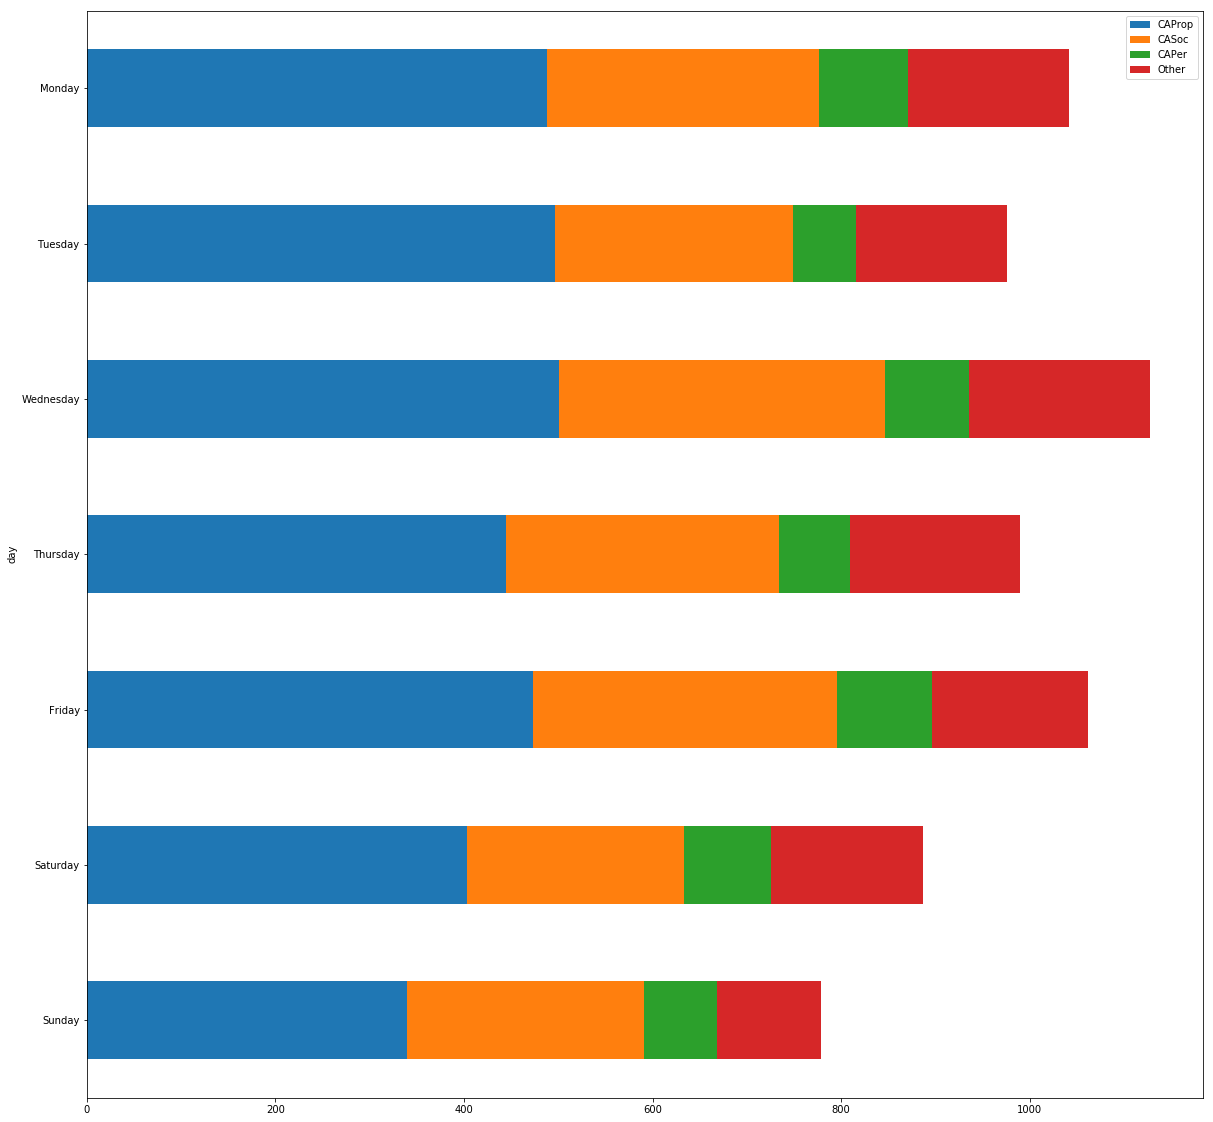

In [103]:
weekandcount(zip20904,25,"Days of the Week = 20904")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

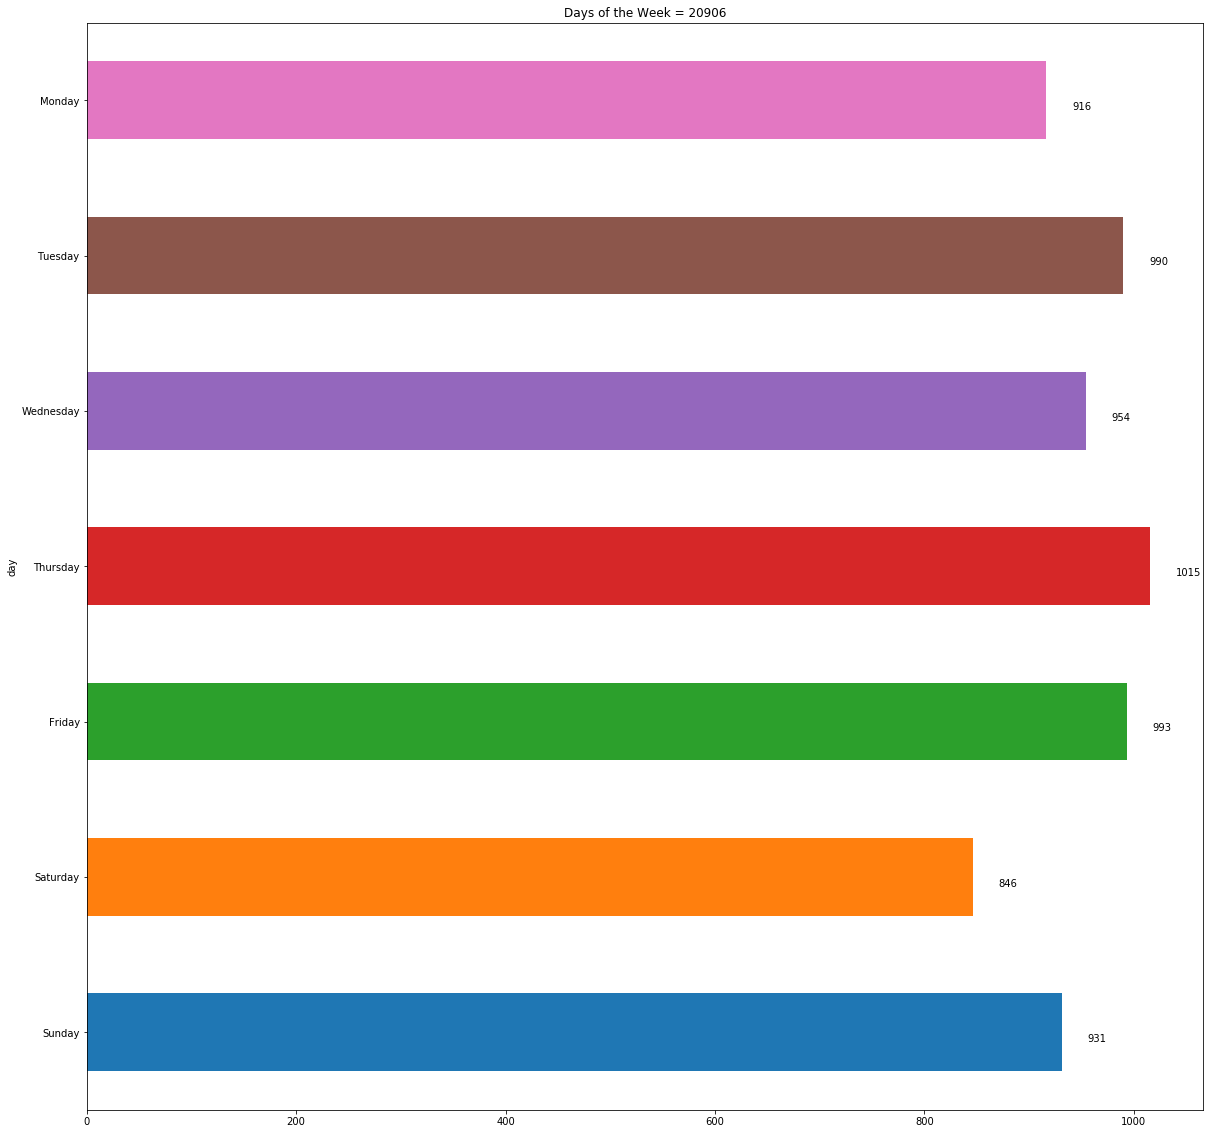

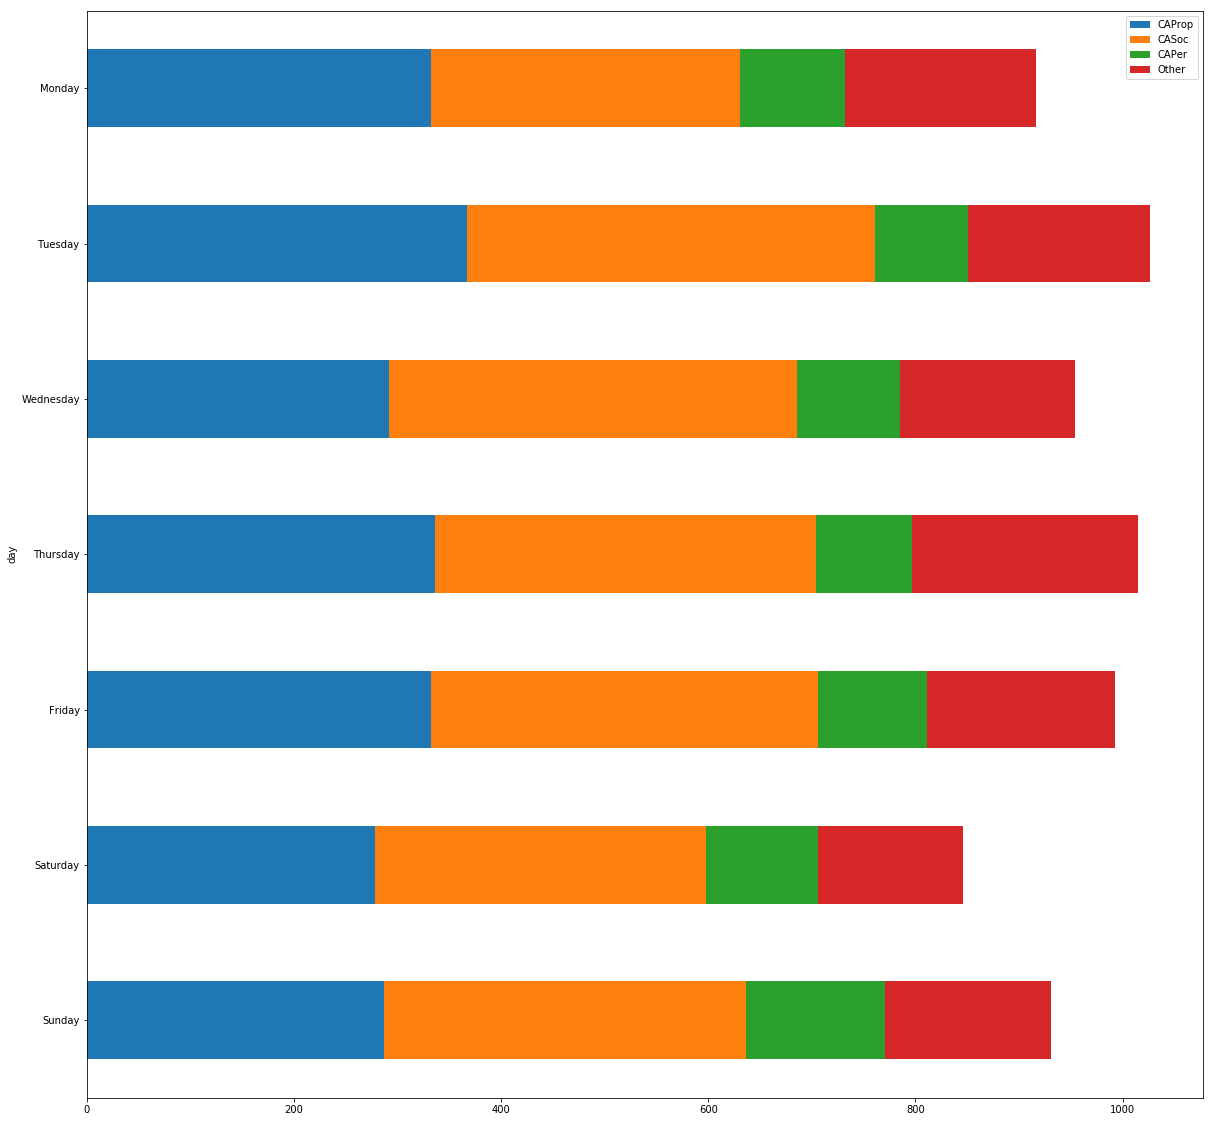

In [104]:
weekandcount(zip20906,25,"Days of the Week = 20906")